---
title: Run Seurat and get TSNE for metabolic genes for 13th, 15th and 17th day data.
authors:
- saksham.malhotra@elucidata.io
tags:
- SingleCell
- RPsvsNeurons
- metabolic genes
- Seurat
created_at: 2019-05-31
updated_at: 2019-05-31
tldr: Runs Seurat for metabolic genes only and computes TSNE. checks overlap of cells assigned when all genes are used and when only metabolic genes are used. 
---

In [3]:
library(GSA)
library(Seurat)
library(ggsci)
packageVersion("Seurat")

#set plot widths for the notebook
library(repr)
options(repr.plot.width=15, repr.plot.height=9)

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix



[1] ‘2.3.0’

## Download 13th,15th and 17th day single cell datasets from GEO 

In [4]:
system("wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE107nnn/GSE107122/suppl/GSE107122_RAW.tar", intern = TRUE)
system("ls", intern = T)

character(0)

[1] "cohort_df.csv"              "gct_to_df.gct"             
 [3] "GSE107122_RAW.tar"          "input_df.csv"              
 [5] "KnowledgeRepo_E135.RData"   "KnowledgeRepo_E155.RData"  
 [7] "KnowledgeRepo_E175.RData"   "metabolic_genes_TSNE.ipynb"
 [9] "meta_sample_df.csv"         "raw_intensity_df.csv"      
[11] "scripts"                    "SDMTools_1.1-221.2.tar.gz" 
[13] "standard_df.csv"

In [5]:
system("tar -xvf GSE107122_RAW.tar", intern = TRUE)

[1] "GSM2861510_E115_All_Cells_DGE.txt.gz"          
[2] "GSM2861510_E115_Only_Cortical_Cells_DGE.txt.gz"
[3] "GSM2861511_E135_All_Cells_DGE.txt.gz"          
[4] "GSM2861511_E135_Only_Cortical_Cells_DGE.txt.gz"
[5] "GSM2861514_E175_All_Cells_DGE.txt.gz"          
[6] "GSM2861514_E175_Only_Cortical_Cells_DGE.txt.gz"

In [6]:
system("gunzip GSM2861511_E135_Only_Cortical_Cells_DGE.txt.gz")

In [7]:
system("wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE107nnn/GSE107122/suppl/GSE107122_E155_Combined_Only_Cortical_Cells_DGE.txt.gz")

In [8]:
system("ls", intern =  TRUE)

[1] "cohort_df.csv"                                         
 [2] "gct_to_df.gct"                                         
 [3] "GSE107122_E155_Combined_Only_Cortical_Cells_DGE.txt.gz"
 [4] "GSE107122_RAW.tar"                                     
 [5] "GSM2861510_E115_All_Cells_DGE.txt.gz"                  
 [6] "GSM2861510_E115_Only_Cortical_Cells_DGE.txt.gz"        
 [7] "GSM2861511_E135_All_Cells_DGE.txt.gz"                  
 [8] "GSM2861511_E135_Only_Cortical_Cells_DGE.txt"           
 [9] "GSM2861514_E175_All_Cells_DGE.txt.gz"                  
[10] "GSM2861514_E175_Only_Cortical_Cells_DGE.txt.gz"        
[11] "input_df.csv"                                          
[12] "KnowledgeRepo_E135.RData"                              
[13] "KnowledgeRepo_E155.RData"                              
[14] "KnowledgeRepo_E175.RData"                              
[15] "metabolic_genes_TSNE.ipynb"                            
[16] "meta_sample_df.csv"                                    
[17] "raw_intensity_df.csv"                                  
[18] "scripts"                                               
[19] "SDMTools_1.1-221.2.tar.gz"                             
[20] "standard_df.csv"

In [9]:
system("gunzip GSE107122_E155_Combined_Only_Cortical_Cells_DGE.txt.gz")

In [10]:
system("gunzip GSM2861514_E175_Only_Cortical_Cells_DGE.txt.gz")

### Download KEGG metabolic gene sets 

In [11]:
system("wget https://data.broadinstitute.org/gsea-msigdb/msigdb/release/6.2/c2.cp.kegg.v6.2.symbols.gmt", intern = TRUE)
system("ls", intern = TRUE)

character(0)

[1] "c2.cp.kegg.v6.2.symbols.gmt"                        
 [2] "cohort_df.csv"                                      
 [3] "gct_to_df.gct"                                      
 [4] "GSE107122_E155_Combined_Only_Cortical_Cells_DGE.txt"
 [5] "GSE107122_RAW.tar"                                  
 [6] "GSM2861510_E115_All_Cells_DGE.txt.gz"               
 [7] "GSM2861510_E115_Only_Cortical_Cells_DGE.txt.gz"     
 [8] "GSM2861511_E135_All_Cells_DGE.txt.gz"               
 [9] "GSM2861511_E135_Only_Cortical_Cells_DGE.txt"        
[10] "GSM2861514_E175_All_Cells_DGE.txt.gz"               
[11] "GSM2861514_E175_Only_Cortical_Cells_DGE.txt"        
[12] "input_df.csv"                                       
[13] "KnowledgeRepo_E135.RData"                           
[14] "KnowledgeRepo_E155.RData"                           
[15] "KnowledgeRepo_E175.RData"                           
[16] "metabolic_genes_TSNE.ipynb"                         
[17] "meta_sample_df.csv"                                 
[18] "raw_intensity_df.csv"                               
[19] "scripts"                                            
[20] "SDMTools_1.1-221.2.tar.gz"                          
[21] "standard_df.csv"

### Get metabolic gene list 

In [12]:
KEGG_gmt <- GSA.read.gmt('c2.cp.kegg.v6.2.symbols.gmt')

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
16

In [13]:
KEGG_gmt$genesets <- lapply(KEGG_gmt$genesets, function(x) stringr::str_to_title(unlist(x)))
metabolic_genes <- unlist(KEGG_gmt$genesets)
metabolic_genes <- unique(metabolic_genes)

In [14]:
str(metabolic_genes)

 chr [1:5266] "Acss2" "Gck" "Pgk2" "Pgk1" "Pdhb" "Pdha1" "Pdha2" "Pgm2" ...


### define tsne plotting function

In [15]:
make_tsne_plot_Freda <- function(Seurat_object,
                                 fill_list =  c("0" = pal_startrek("uniform")(7)[1], 
                                                "1" = pal_startrek("uniform")(7)[2], 
                                                "2" = pal_startrek("uniform")(7)[3])){
    require(ggplot2)

    tsne_df <- as.data.frame(Seurat_object@dr$tsne@cell.embeddings)
    tsne_df$ident <- Seurat_object@ident

    # function for plotting
    p <- ggplot(tsne_df, aes(x = tSNE_1, y = tSNE_2, fill = ident)) + # calls the ggplot function with dose on the x-axis and len on the y-axis
    geom_point(shape = 21, size = 5, alpha = 0.9) + # scatter plot function with shape of points defined as 21 scale.
    labs(x = "", y = "", fill = "ident") + # x and y axis labels
    scale_x_continuous(breaks = seq(1, 31, 5)) +    # breaks for x-axis
    scale_size(range = c(1, 10)) +  # scales area of the plot
    scale_fill_manual(name = "metabolic state", values = fill_list) + # filling the point colors
    theme(legend.position = "right", legend.direction = "vertical", 
          legend.justification = "top",# legend positioned at the bottom, horizantal direction,
    axis.line = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    panel.grid.major = element_blank(), # major grids included
    panel.grid.minor = element_blank(), # no minor grids
    panel.border = element_blank(), panel.background = element_blank(), # no borders and background color
    axis.title = element_text(colour="black", size = 15, face = "bold"), # axis title
    legend.text = element_text(size = 10, face = "bold"),
    legend.title = element_text(colour="black", size=12, face="bold"),
    axis.ticks.length = unit(0.25, "cm"),
    axis.ticks = element_blank())
    return(p)
}

## 13th day Metabolic genes analysis

### Read the 13th day Seurat object from previous analysis

In [19]:
download_project_file("E135_Cortical.rds")

[1] "/import/E135_Cortical.rds"

In [20]:
E135_Cortical <- readRDS("E135_Cortical.rds")

### Read 13th day dataset

In [21]:
E135_Cortical_data <- read.table("GSM2861511_E135_Only_Cortical_Cells_DGE.txt",sep= "\t", header=TRUE, row.names=1)

In [22]:
head(E135_Cortical_data)

GTAGCAATTTCT TACTAGATGCTA TATCAGCAGATT TACAGGCCCGTC TGATATACACTT
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            2            0            0           
0610007P14Rik 0            0            1            1            0           
0610009B22Rik 0            1            0            0            1           
0610009D07Rik 0            2            1            0            2           
0610009E02Rik 0            0            0            0            0           
              ATTTCGCGTGAA GGTTTGTCCTTT AACGTCACATCC CCTATCCTTTGC AAATTCGTCGGT
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 1            0            1            0            0           
0610009B22Rik 0            0            0            0            0           
0610009D07Rik 0            4            2            0            2           
0610009E02Rik 0            0            0            0            0           
              ⋯ GCCGATAGAGCN TCAATCCGCGGG AGTGTGATAGTG TCATTGCGGCTG
0610005C13Rik ⋯ 0            0            0            0           
0610007N19Rik ⋯ 0            2            0            0           
0610007P14Rik ⋯ 0            0            0            1           
0610009B22Rik ⋯ 0            0            0            0           
0610009D07Rik ⋯ 1            0            0            1           
0610009E02Rik ⋯ 0            0            0            0           
              CTCTAGCTTCCG CTAACGCAAGAC GTGTTTGCGGTA ATGTTGCATGAC ATACCAGCTAAG
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 1            0            0            0            0           
0610009B22Rik 0            0            0            0            0           
0610009D07Rik 1            0            0            0            0           
0610009E02Rik 0            0            0            0            0           
              ATGTTGCATGAN
0610005C13Rik 0           
0610007N19Rik 0           
0610007P14Rik 0           
0610009B22Rik 0           
0610009D07Rik 0           
0610009E02Rik 0

In [23]:
dim(E135_Cortical_data)

[1] 17082  1137

### Take only metabolic genes from the data

In [24]:
E135_Cortical_metabolic_data <- E135_Cortical_data[rownames(E135_Cortical_data)[rownames(E135_Cortical_data) %in% metabolic_genes],]
dim(E135_Cortical_metabolic_data)

[1] 3722 1137

### Create Seurat object using the metabolic gene subset of the data

In [25]:
E135_Cortical_metabolic <- CreateSeuratObject(raw.data = E135_Cortical_metabolic_data, 
                                              min.cells = 3, min.genes = 200, project = "E155_Cortical")

### Run the preprocessing Seurat steps

Warning message in SingleVlnPlot(feature = x, data = data.use[, x, drop = FALSE], :
“All cells have the same value of feature.”
Warning message in cor(x = data.plot$x, y = data.plot$y):
“the standard deviation is zero”


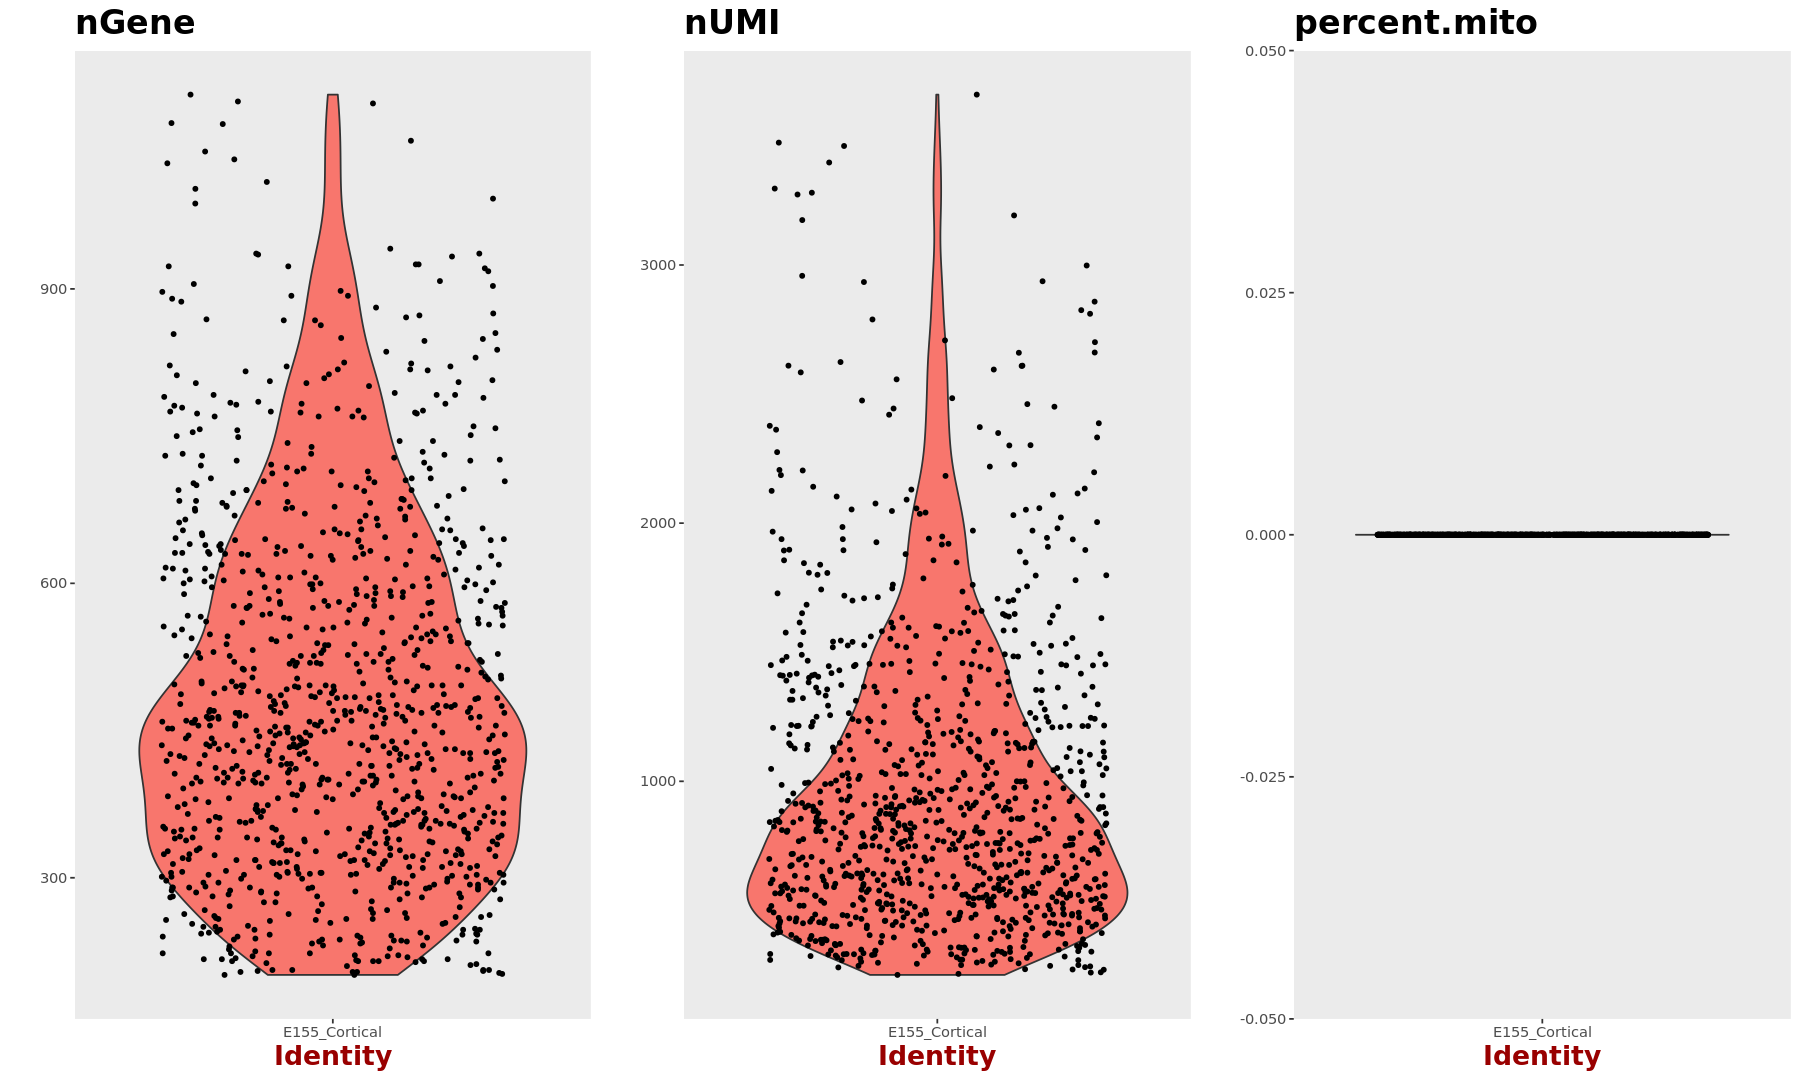

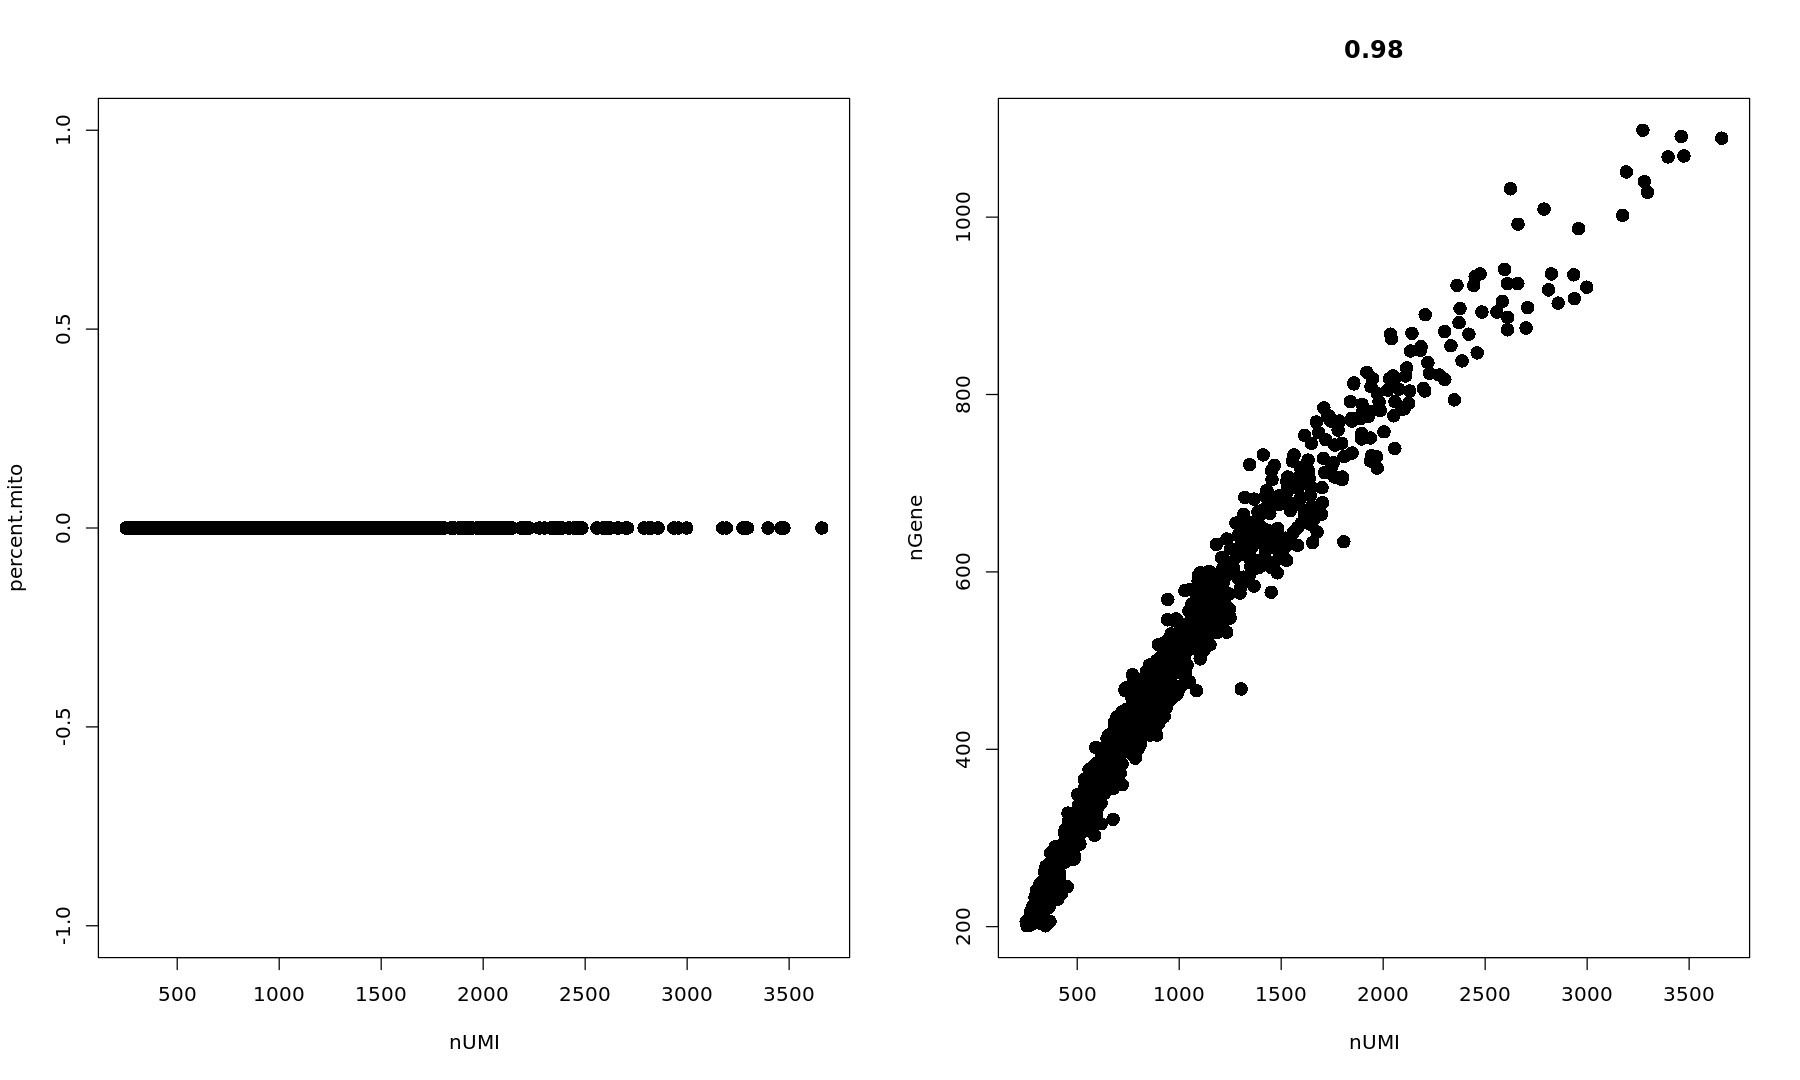

In [26]:
mito.genes <- grep(pattern = "^MT-", x = rownames(x = E135_Cortical_metabolic@data), value = TRUE)
percent.mito <- Matrix::colSums(E135_Cortical_metabolic@raw.data[mito.genes, ]) / Matrix::colSums(E135_Cortical_metabolic@raw.data)

E135_Cortical_metabolic <- AddMetaData(object = E135_Cortical_metabolic, metadata = percent.mito, col.name = "percent.mito")
VlnPlot(object = E135_Cortical_metabolic, features.plot = c("nGene", "nUMI", "percent.mito"), nCol = 3)

par(mfrow = c(1, 2))
GenePlot(object = E135_Cortical_metabolic, gene1 = "nUMI", gene2 = "percent.mito")
GenePlot(object = E135_Cortical_metabolic, gene1 = "nUMI", gene2 = "nGene")

E135_Cortical_metabolic <- FilterCells(object = E135_Cortical_metabolic, 
                                       subset.names = c("nGene", "percent.mito"), 
                                       low.thresholds = c(200, -Inf), high.thresholds = c(2500, 0.05))

In [27]:
E135_Cortical_metabolic <- NormalizeData(object = E135_Cortical_metabolic, normalization.method = "LogNormalize", scale.factor = 1e4)
E135_Cortical_metabolic <- ScaleData(object = E135_Cortical_metabolic, vars.to.regress = c("nUMI", "percent.mito"))

[1] "Regressing out nUMI"         "Regressing out percent.mito"
  |======================================================================| 100%
Time Elapsed:  8.24542784690857 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


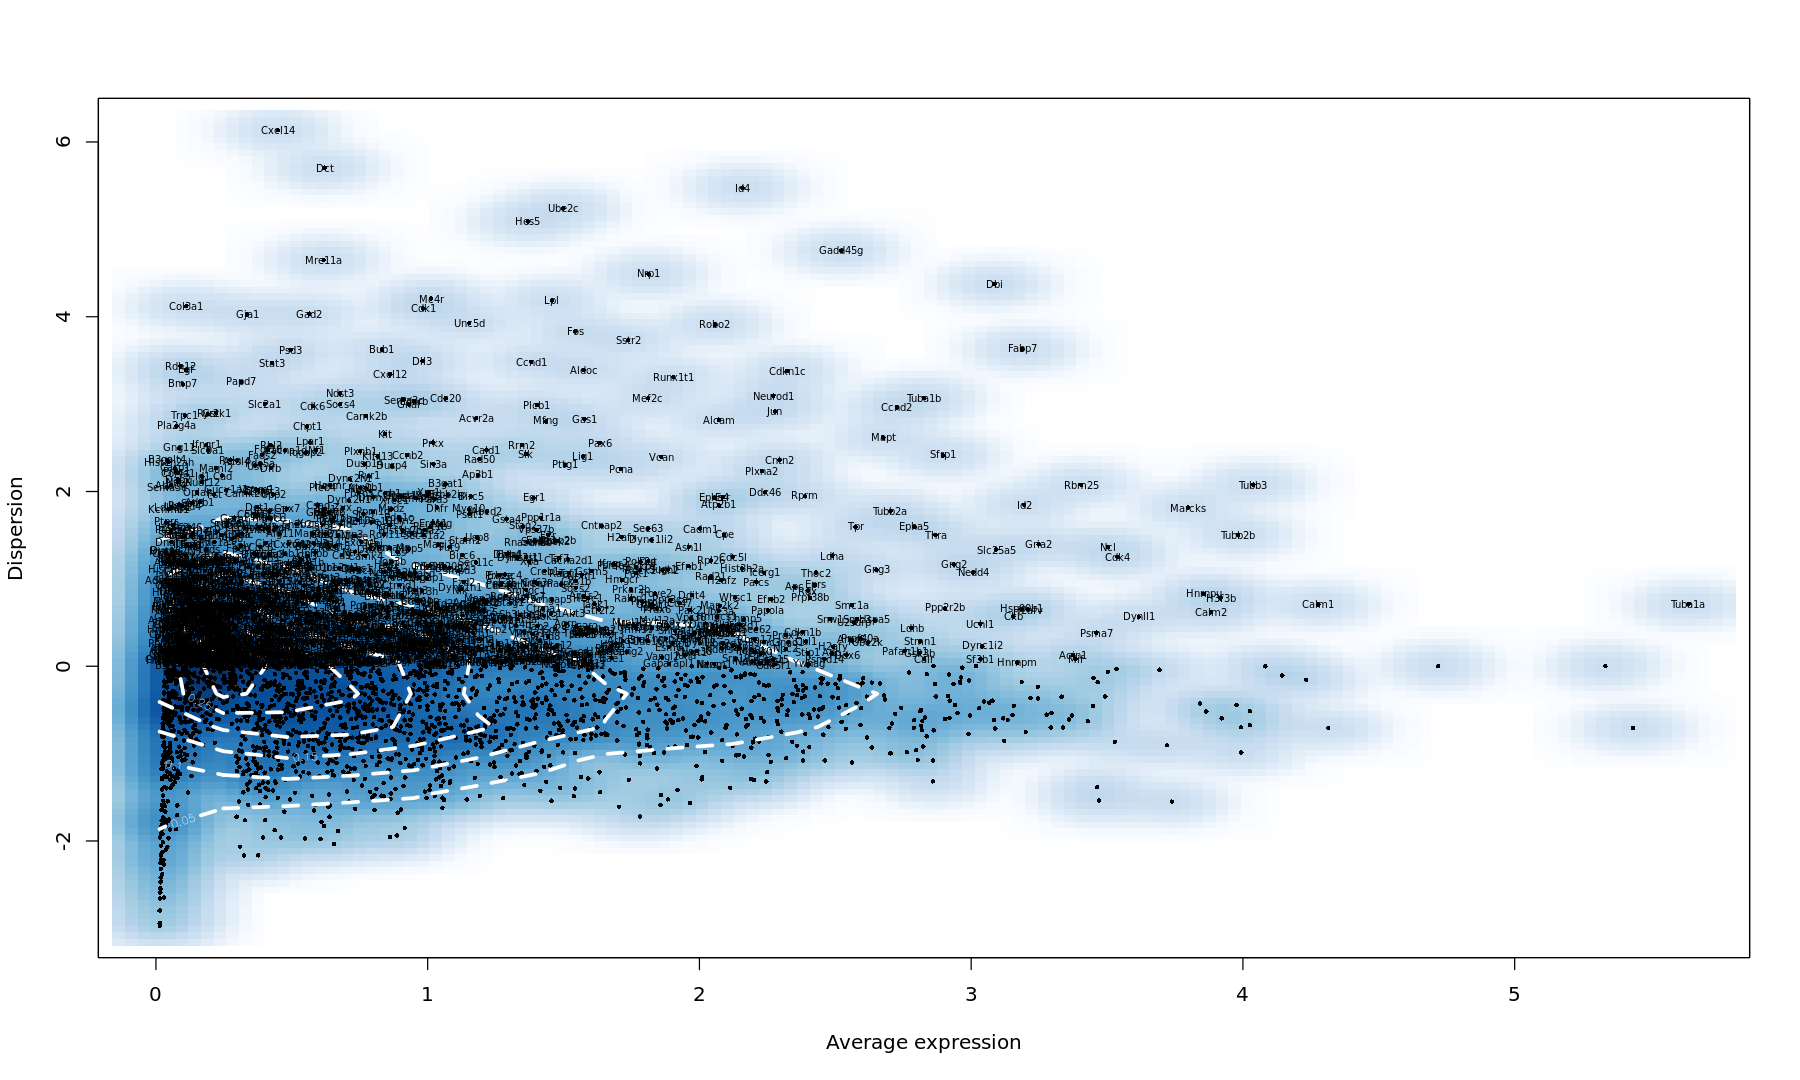

In [28]:
E135_Cortical_metabolic <- FindVariableGenes(object = E135_Cortical_metabolic, mean.function = ExpMean, dispersion.function = LogVMR, 
                                             x.low.cutoff = 0, x.high.cutoff = 8.0, y.cutoff = 0.01)

In [29]:
length(E135_Cortical_metabolic@var.genes)

[1] 1365

In [30]:
E135_Cortical_metabolic <- RunPCA(object = E135_Cortical_metabolic, pc.genes = E135_Cortical_metabolic@var.genes, 
                                  do.print = TRUE, pcs.print = 1:5, genes.print = 5)

[1] "PC1"
[1] "Tuba1a" "Tubb3"  "Mapt"   "Thra"   "Gng2"  
[1] ""
[1] "Dbi"   "Gas1"  "Aldoc" "Fabp7" "Id4"  
[1] ""
[1] ""
[1] "PC2"
[1] "Tubb2a"  "Dync1i1" "Mapt"    "Mef2c"   "Prkar2b"
[1] ""
[1] "Sstr2"   "Neurod1" "Nrp1"    "Mfng"    "Cdk4"   
[1] ""
[1] ""
[1] "PC3"
[1] "Ccna2" "Birc5" "Ube2c" "Bub1b" "Bub1" 
[1] ""
[1] "Ldha"    "Gadd45g" "Ckb"     "Rprm"    "Nedd4"  
[1] ""
[1] ""
[1] "PC4"
[1] "Camk2b"  "Mfng"    "Dync1i1" "Atp1b1"  "Vcan"   
[1] ""
[1] "Cntn2"   "Mif"     "Jun"     "Calr"    "Ppp2r1b"
[1] ""
[1] ""
[1] "PC5"
[1] "Ccnb2"  "Cdc20"  "Pttg1"  "Ccnb1"  "Tuba1c"
[1] ""
[1] "Lig1"  "Pcna"  "Prim1" "Mcm6"  "Rpa2" 
[1] ""
[1] ""


### Finding clusters

Here we reduce the resolution toget three clusters

In [31]:
E135_Cortical_metabolic_minclusters <- FindClusters(object = E135_Cortical_metabolic, reduction.type = "pca", dims.use = 1:20, 
                                                    resolution = 0.5, print.output = 0, save.SNN = TRUE, force.recalc = T)

In [32]:
E135_Cortical_metabolic_minclusters <- RunTSNE(object = E135_Cortical_metabolic_minclusters, dims.use = 1:20, do.fast = TRUE)

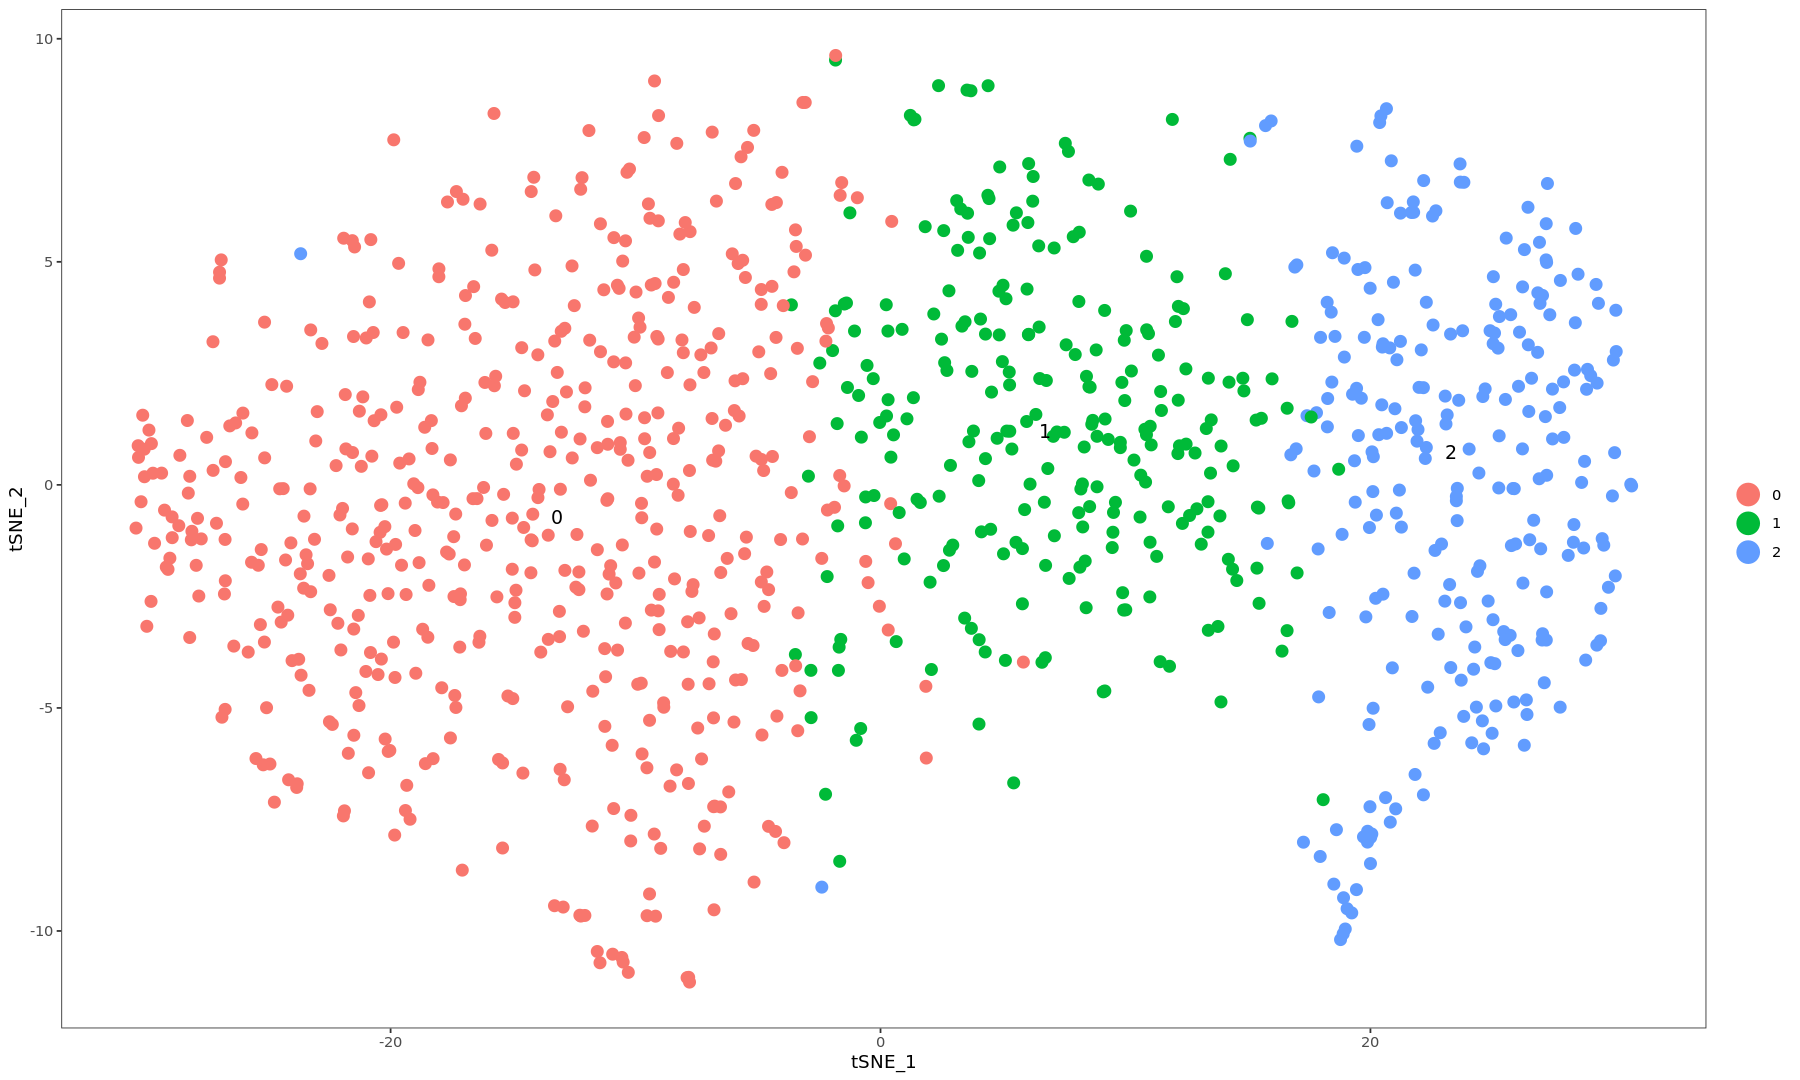

In [33]:
TSNEPlot(object = E135_Cortical_metabolic_minclusters, do.label = T, pt.size = 3)

In [46]:
saveRDS(E135_Cortical_metabolic_minclusters, "E135_Cortical_metabolic_minclusters.rds")

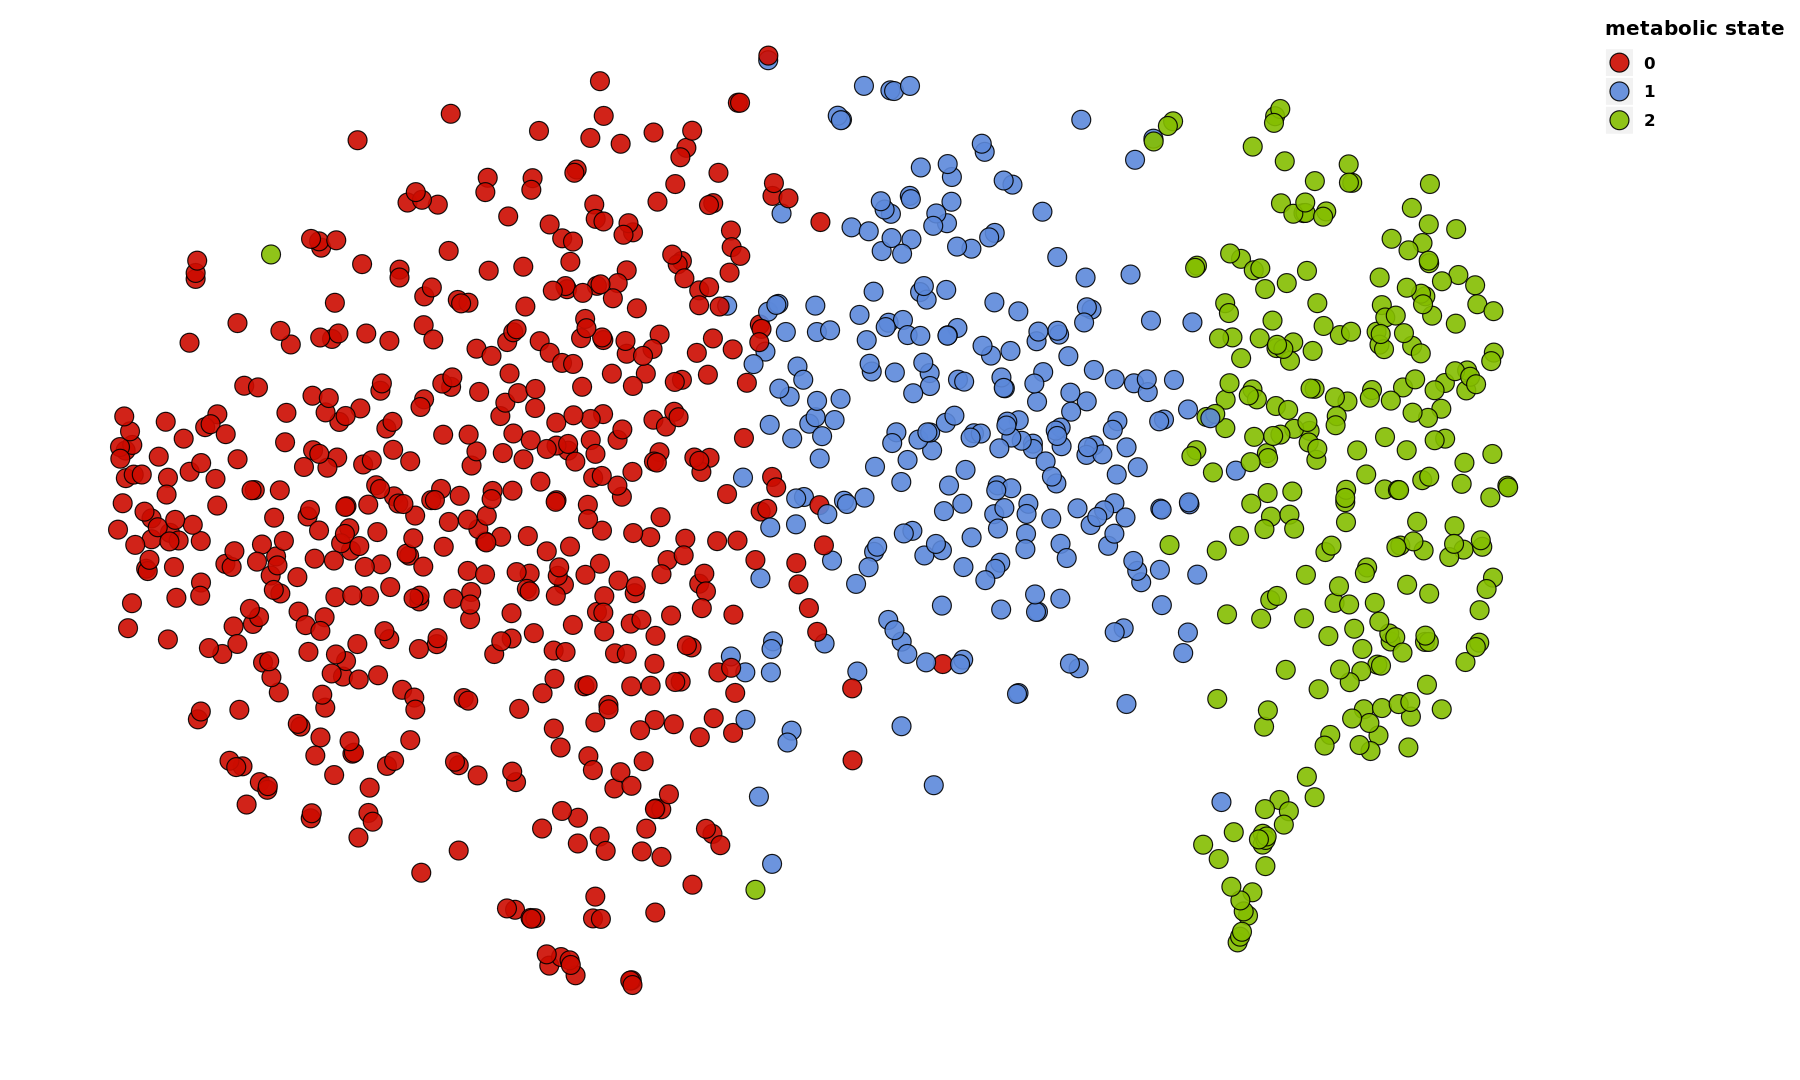

In [34]:
make_tsne_plot_Freda(E135_Cortical_metabolic_minclusters)

In [47]:
table(E135_Cortical_metabolic_minclusters@ident)


  0   1   2 
524 259 249 

### Get 4,5,6 clusters

In [48]:
E135_Cortical_metabolic_cluster_n4 <- FindClusters(object = E135_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.7, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E135_Cortical_metabolic_cluster_n4@ident)


  0   1   2   3 
323 247 236 226 

In [49]:
E135_Cortical_metabolic_cluster_n5 <- FindClusters(object = E135_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 1.5, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E135_Cortical_metabolic_cluster_n5@ident)


  0   1   2   3   4 
246 234 234 192 126 

In [50]:
E135_Cortical_metabolic_cluster_n6 <- FindClusters(object = E135_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 1.6, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E135_Cortical_metabolic_cluster_n6@ident)


  0   1   2   3   4   5 
246 222 194 147 128  95 

### function to get overlaps between clusters of two seurat objects

In [76]:
get_overlap_df_two_clusters <- function(Seurat_obj1, Seurat_obj2, cell_types = c("Neurons","IPs","RPs")){
    overlap_mat <- matrix(0,nrow=length(unique(Seurat_obj1@ident)), 
                      ncol = length(unique(Seurat_obj2@ident)))

    rownames(overlap_mat) <- sort(unique(Seurat_obj1@ident))
    colnames(overlap_mat) <- sort(unique(Seurat_obj2@ident))

    overlap_mat <- t(sapply(rownames(overlap_mat),
                          function(x1) sapply(colnames(overlap_mat),
                                              function(x2) 
                                                  overlap_mat[x1,x2] = length(intersect(SubsetData(Seurat_obj1,ident.use = x1)@cell.names, 
                                                                                        SubsetData(Seurat_obj2, ident.use = x2)@cell.names))),
                                              USE.NAMES = F))


    rownames(overlap_mat) <- sort(unique(Seurat_obj1@ident))
    colnames(overlap_mat) <- sort(unique(Seurat_obj2@ident))
                            
#head(E155_overlap_mat_minclusters)
    overlap_mat_perc <- (overlap_mat/rowSums(overlap_mat)) * 100
    
    overlap_df <- expand.grid(cell_types, c(0:(length(unique(Seurat_obj2@ident))-1)))
    colnames(overlap_df) <- c('variable_cluster', 'metabolic_cluster')
    overlap_df$variable_cluster <- as.character(overlap_df$variable_cluster)
    overlap_df$metabolic_cluster <- as.character(overlap_df$metabolic_cluster)
    overlap_df$overlap <- apply(overlap_df, 1, function(x) 
        overlap_mat_perc[x['variable_cluster'], x['metabolic_cluster']]) 
    return(overlap_df)
}

In [96]:
overlap_plot <- function(overlap_df,  fill_list =  c("0" = pal_startrek("uniform")(7)[1], 
                                                "1" = pal_startrek("uniform")(7)[2], 
                                                "2" = pal_startrek("uniform")(7)[3]),
                        scale_x = c("RPs", "IPs", "Neurons"), 
                         label_vals = c("2" = "S0",  "1" = "S1", "0" = "S2"), legend_label = "metabolic state",
                        reverse = TRUE){
    
    
    p <- ggplot(overlap_df, aes(x=variable_cluster, y=overlap/100, fill=metabolic_cluster)) + 
        geom_bar(stat="identity", color = "black", width = 0.95)  + 
        ylab("Proportion of cells")+ xlab("cell type") + 
        scale_fill_manual(name = legend_label, values = fill_list, 
                          labels = label_vals, guide = guide_legend(reverse = reverse)) +
        scale_y_continuous(expand = c(0, 0), limits = c(0, 1.05)) +  
        scale_x_discrete(limits=scale_x) + 
         theme(axis.line = element_line(size=1, colour = "black"),
               panel.grid.major = element_blank(),
               panel.grid.minor = element_blank(),
                panel.border = element_blank(),
               legend.position = "right", 
               legend.justification = "top",
                panel.background = element_blank(),
                axis.text.x=element_text(colour="black", size = 30, face = "bold"),
                axis.text.y=element_text(colour="black", size = 25, face = "bold"),
                legend.key= element_rect(colour="black", size=1),
               legend.key.size = unit(1.5, 'lines'),
               axis.title.x = element_blank(), #element_text(colour="black", size = 30, face = "bold", margin=margin(17,0,0,0)),
                axis.title.y = element_text(colour="black", size = 30, face = "bold"),
                legend.text = element_text(size = 25, face = "bold"),#make 25
                legend.title = element_text(colour="black", size=25, face="bold"),
                axis.ticks.length=unit(.2, "cm"),
              aspect.ratio = 1.25/1)
    return(p) 

}

In [92]:
E135_overlap_minclusters <- get_overlap_df_two_clusters(E135_Cortical, E135_Cortical_metabolic_minclusters)

In [93]:
head(E135_overlap_minclusters)

variable_cluster metabolic_cluster overlap   
1 Neurons          0                 35.0000000
2 IPs              0                  0.0000000
3 RPs              0                  0.7751938
4 Neurons          1                 65.0000000
5 IPs              1                 55.7077626
6 RPs              1                  6.2015504

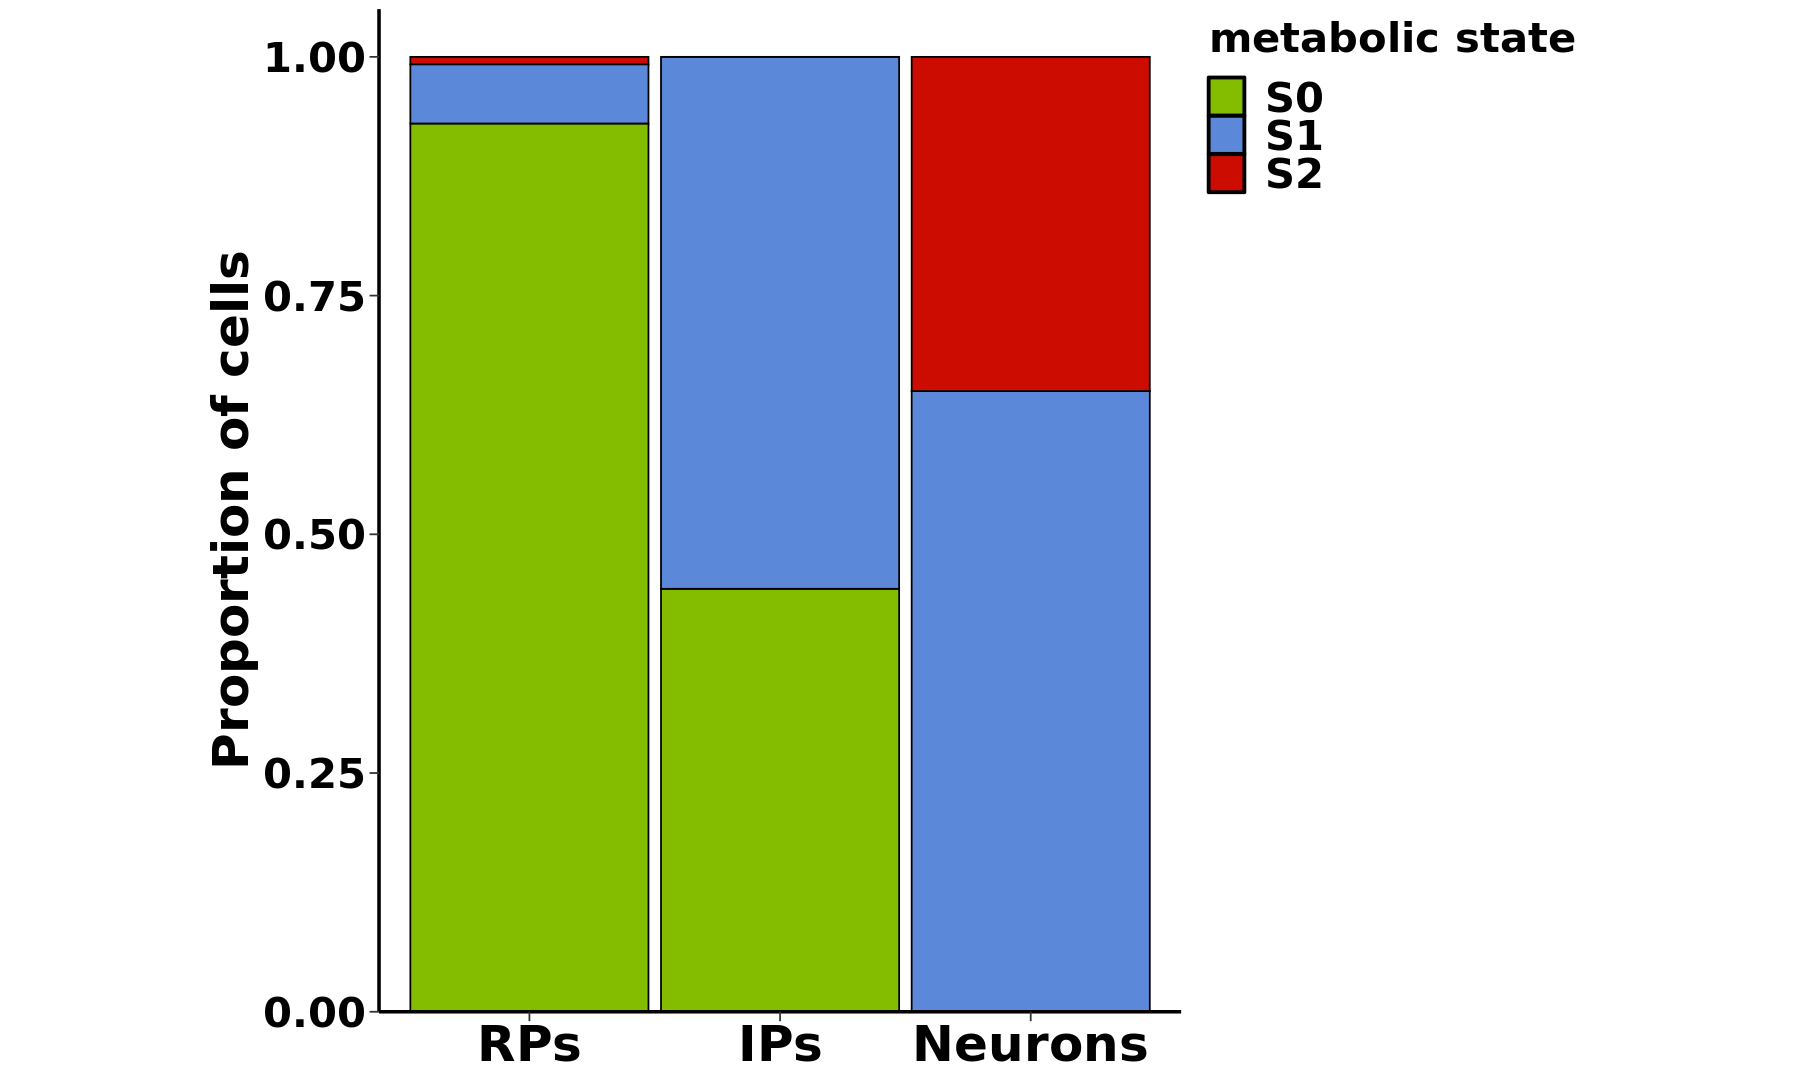

In [97]:
overlap_plot(E135_overlap_minclusters)

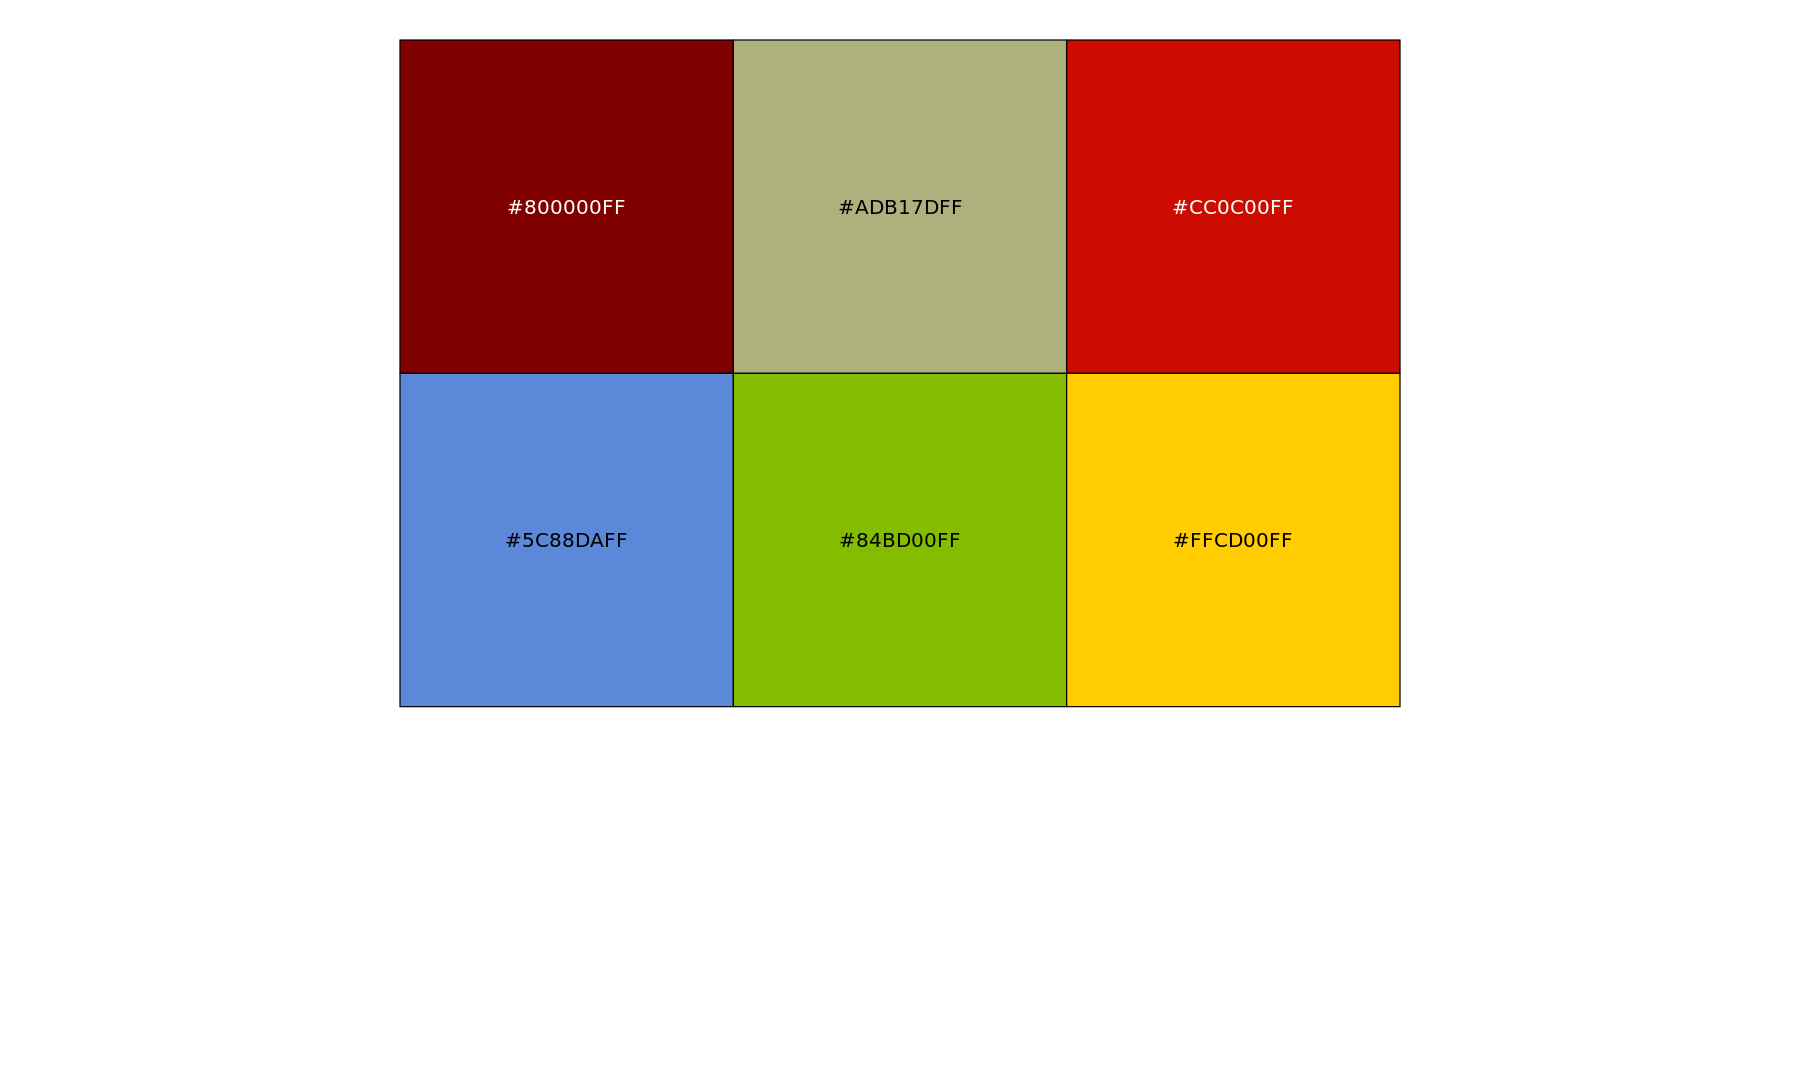

In [172]:
library("scales")
show_col(c(pal_uchicago("light")(7)[1], pal_uchicago("light")(7)[4], 
           pal_startrek("uniform")(7)[1],pal_startrek("uniform")(7)[2],
           pal_startrek("uniform")(7)[3],
          pal_startrek("uniform")(7)[4]))

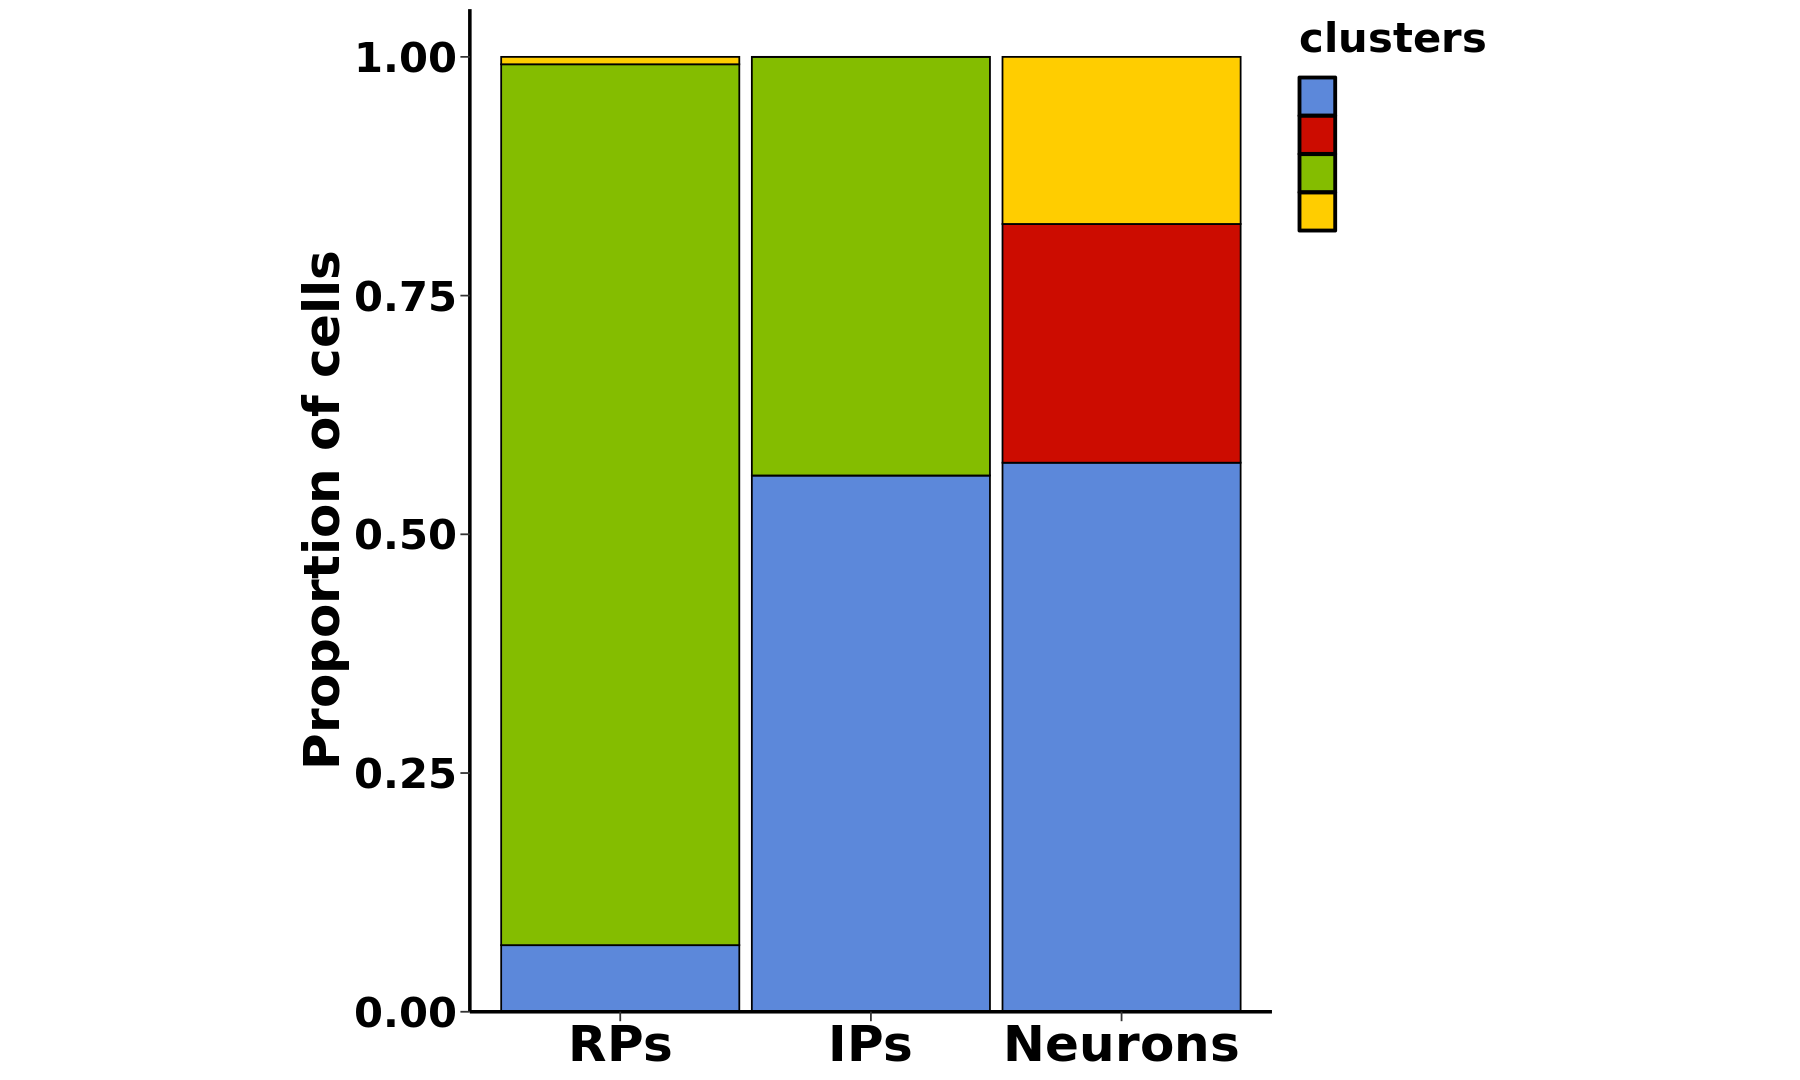

In [174]:
E135_overlap_df_n4 <- get_overlap_df_two_clusters(E135_Cortical, E135_Cortical_metabolic_cluster_n4)
p <- overlap_plot(E135_overlap_df_n4, fill_list =  c("0" = pal_startrek("uniform")(7)[4], 
                                                "1" = pal_startrek("uniform")(7)[3], 
                                                "2" = pal_startrek("uniform")(7)[1],
                                                "3" = pal_startrek("uniform")(7)[2]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = ""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E13_celltype_n4.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

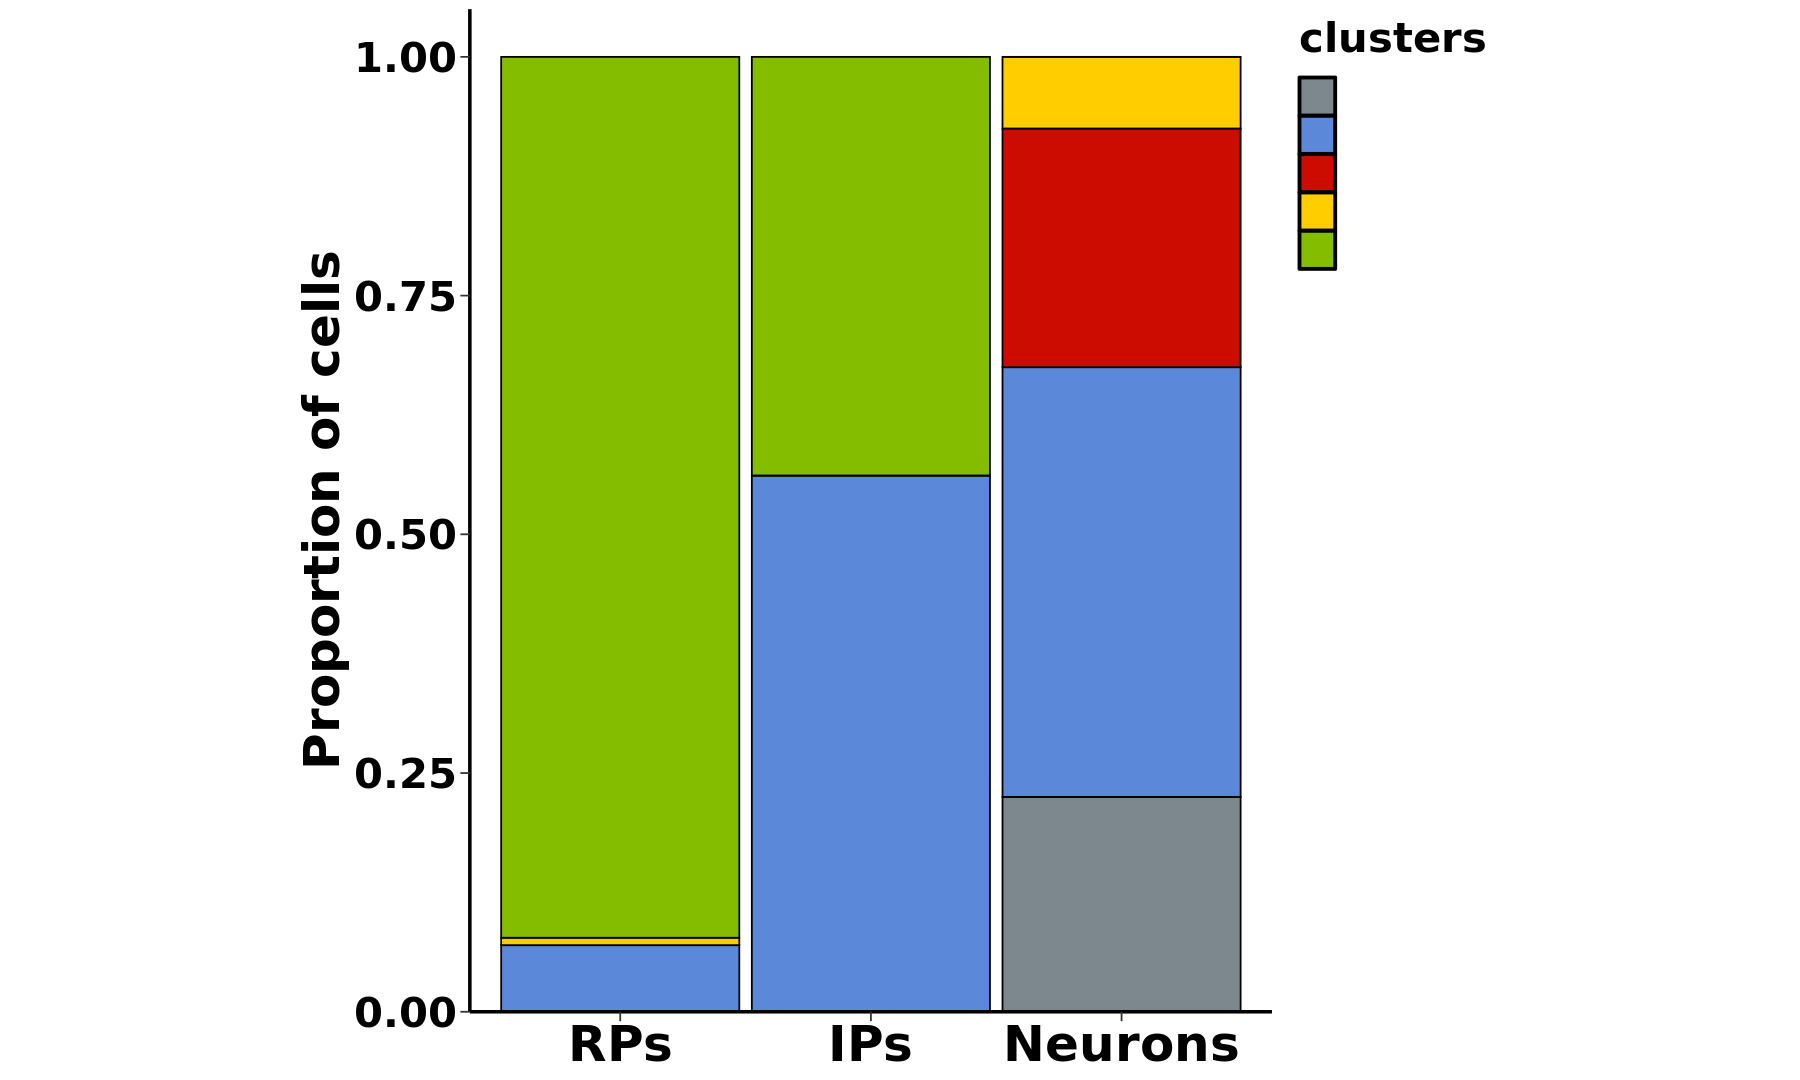

In [175]:
E135_overlap_df_n5 <- get_overlap_df_two_clusters(E135_Cortical, E135_Cortical_metabolic_cluster_n5)
p <- overlap_plot(E135_overlap_df_n5, fill_list =  c("0" = pal_startrek("uniform")(7)[3], 
                                                "1" = pal_startrek("uniform")(7)[4], 
                                                "2" = pal_startrek("uniform")(7)[1],
                                                "3" = pal_startrek("uniform")(7)[2],
                                                 "4" = pal_startrek("uniform")(7)[5]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = "", "4"=""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E13_celltype_n5.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

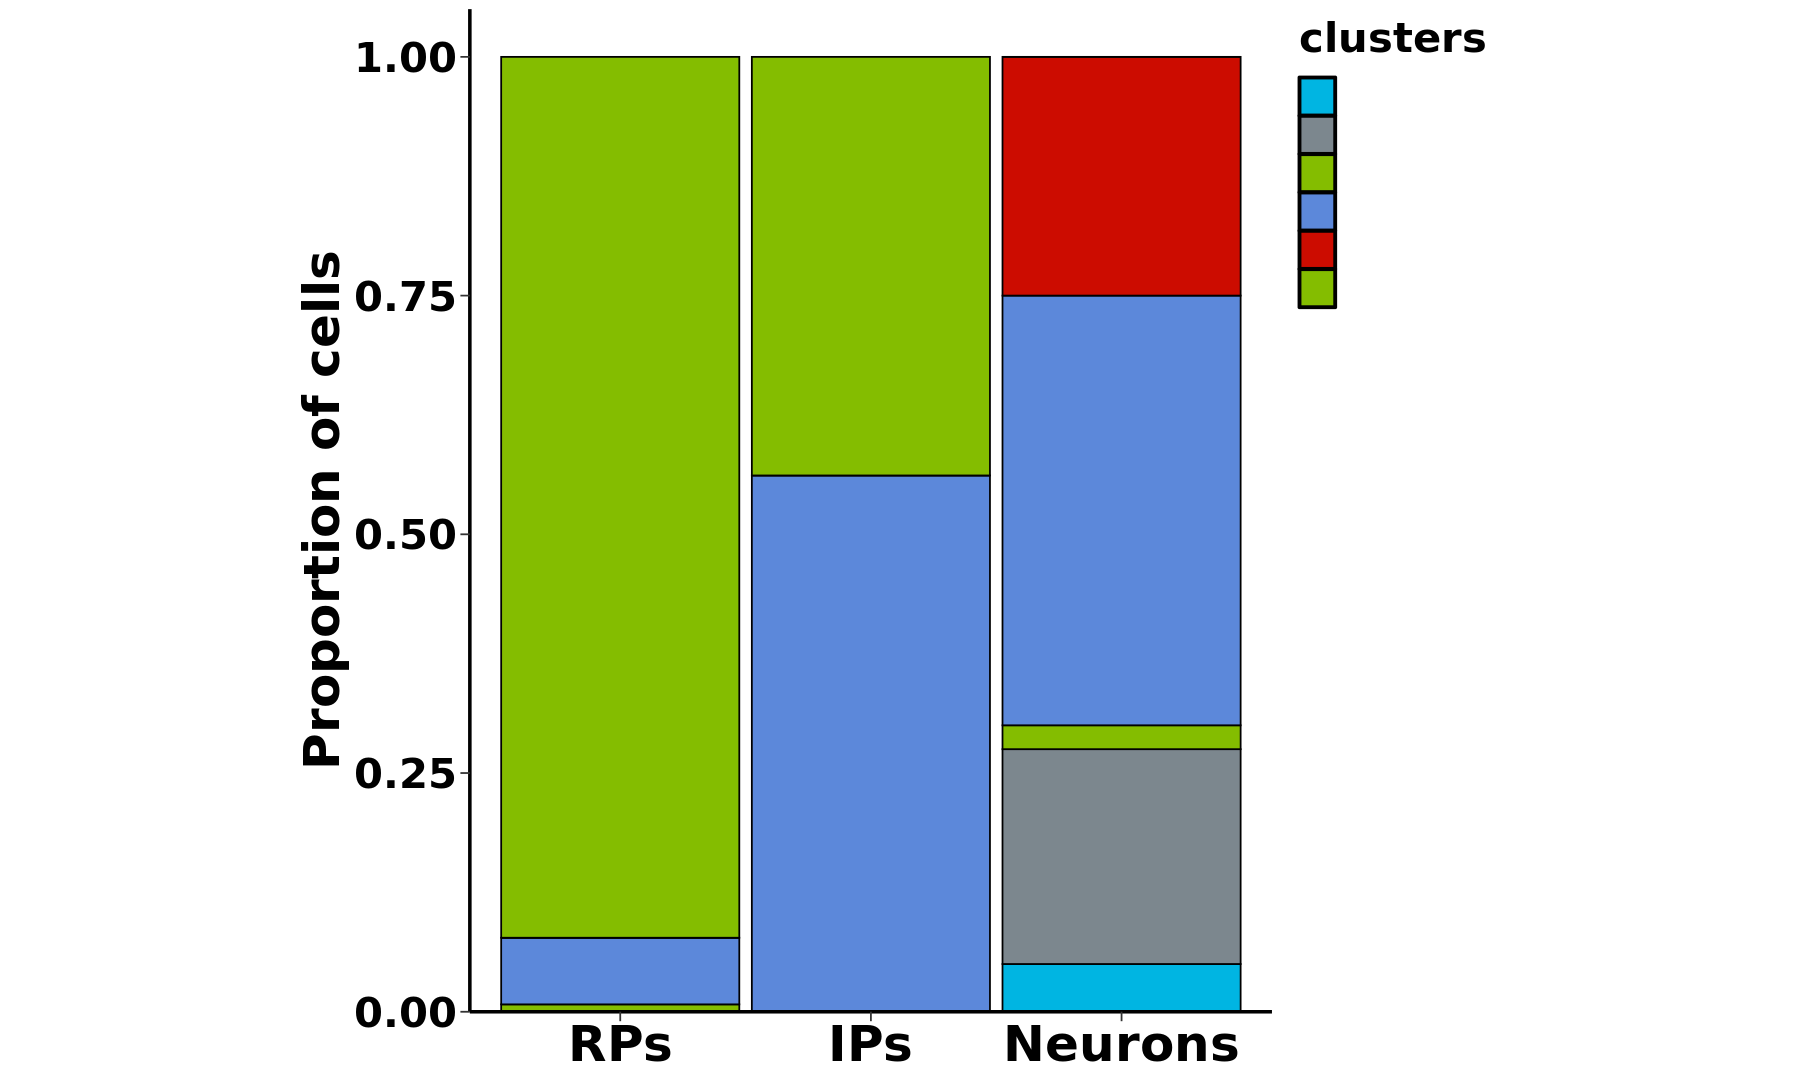

In [177]:
E135_overlap_df_n6 <-  get_overlap_df_two_clusters(E135_Cortical, E135_Cortical_metabolic_cluster_n6)
p <- overlap_plot(E135_overlap_df_n6, fill_list =  c("0" = pal_startrek("uniform")(7)[3], 
                                                "1" = pal_startrek("uniform")(7)[1], 
                                                "2" = pal_startrek("uniform")(7)[2],
                                                "3" = pal_startrek("uniform")(7)[3],
                                                 "4" = pal_startrek("uniform")(7)[5],
                                                 "5" = pal_startrek("uniform")(7)[6]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = "", "4" = "", "5"= ""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E13_celltype_n6.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

## 15th day metabolic genes analysis

### Read the 15th day Seurat object from previous analysis

In [101]:
E155_Cortical <- readRDS("E155_Cortical.rds")

### Read 15th day dataset

In [102]:
E155_Cortical_data <- read.table("GSE107122_E155_Combined_Only_Cortical_Cells_DGE.txt",sep= "\t", header=TRUE, row.names=1)

In [103]:
dim(E155_Cortical_data)
head(E155_Cortical_data)

[1] 19692  2955

CTGATGGTCTTT CACCGTTAGGAC TAATTCATTCTC TGAGATTATCTT CCCGGCGGCCAC
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            1            0            3           
0610007P14Rik 0            1            0            2            1           
0610009B22Rik 2            1            0            0            1           
0610009D07Rik 4            1            0            3            4           
0610009E02Rik 0            0            0            0            0           
              GTCCTTCCATGT AGCTCGTTTCCA CATATCCATCGC TTACCTTCTCTG ACCTCTCACTTA
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 1            1            3            0            0           
0610009B22Rik 0            0            0            0            2           
0610009D07Rik 2            3            0            7            2           
0610009E02Rik 0            0            0            0            0           
              ⋯ CCAAGGTCCCAA ACCCCTGCGTGT AGACGGTTTACG TAGAGCCCTTCG
0610005C13Rik ⋯ 0            0            0            0           
0610007N19Rik ⋯ 0            1            0            0           
0610007P14Rik ⋯ 0            1            0            0           
0610009B22Rik ⋯ 0            0            1            0           
0610009D07Rik ⋯ 1            1            0            2           
0610009E02Rik ⋯ 0            0            0            0           
              CTGAAGCCGGCC CGCCTCCGCTTA TCACATTCTACT TCTGCGGCCGGA AGAAGGCTATAT
0610005C13Rik 0            0            0            0            0           
0610007N19Rik 0            0            0            0            0           
0610007P14Rik 0            0            0            0            1           
0610009B22Rik 0            0            0            0            0           
0610009D07Rik 1            1            0            0            0           
0610009E02Rik 0            0            0            0            0           
              GGGGCATTCGCA
0610005C13Rik 0           
0610007N19Rik 1           
0610007P14Rik 0           
0610009B22Rik 0           
0610009D07Rik 0           
0610009E02Rik 0

### Take only metabolic genes from the data

In [104]:
E155_Cortical_metabolic_data <- E155_Cortical_data[rownames(E155_Cortical_data)[rownames(E155_Cortical_data) %in% metabolic_genes],]
dim(E155_Cortical_metabolic_data)

[1] 4068 2955

### Create Seurat object using the metabolic gene subset of the data

In [105]:
E155_Cortical_metabolic <- CreateSeuratObject(raw.data = E155_Cortical_metabolic_data, 
                                              min.cells = 3, min.genes = 200, project = "E155_Cortical")

### Run the preprocessing Seurat steps

Warning message in SingleVlnPlot(feature = x, data = data.use[, x, drop = FALSE], :
“All cells have the same value of feature.”
Warning message in cor(x = data.plot$x, y = data.plot$y):
“the standard deviation is zero”


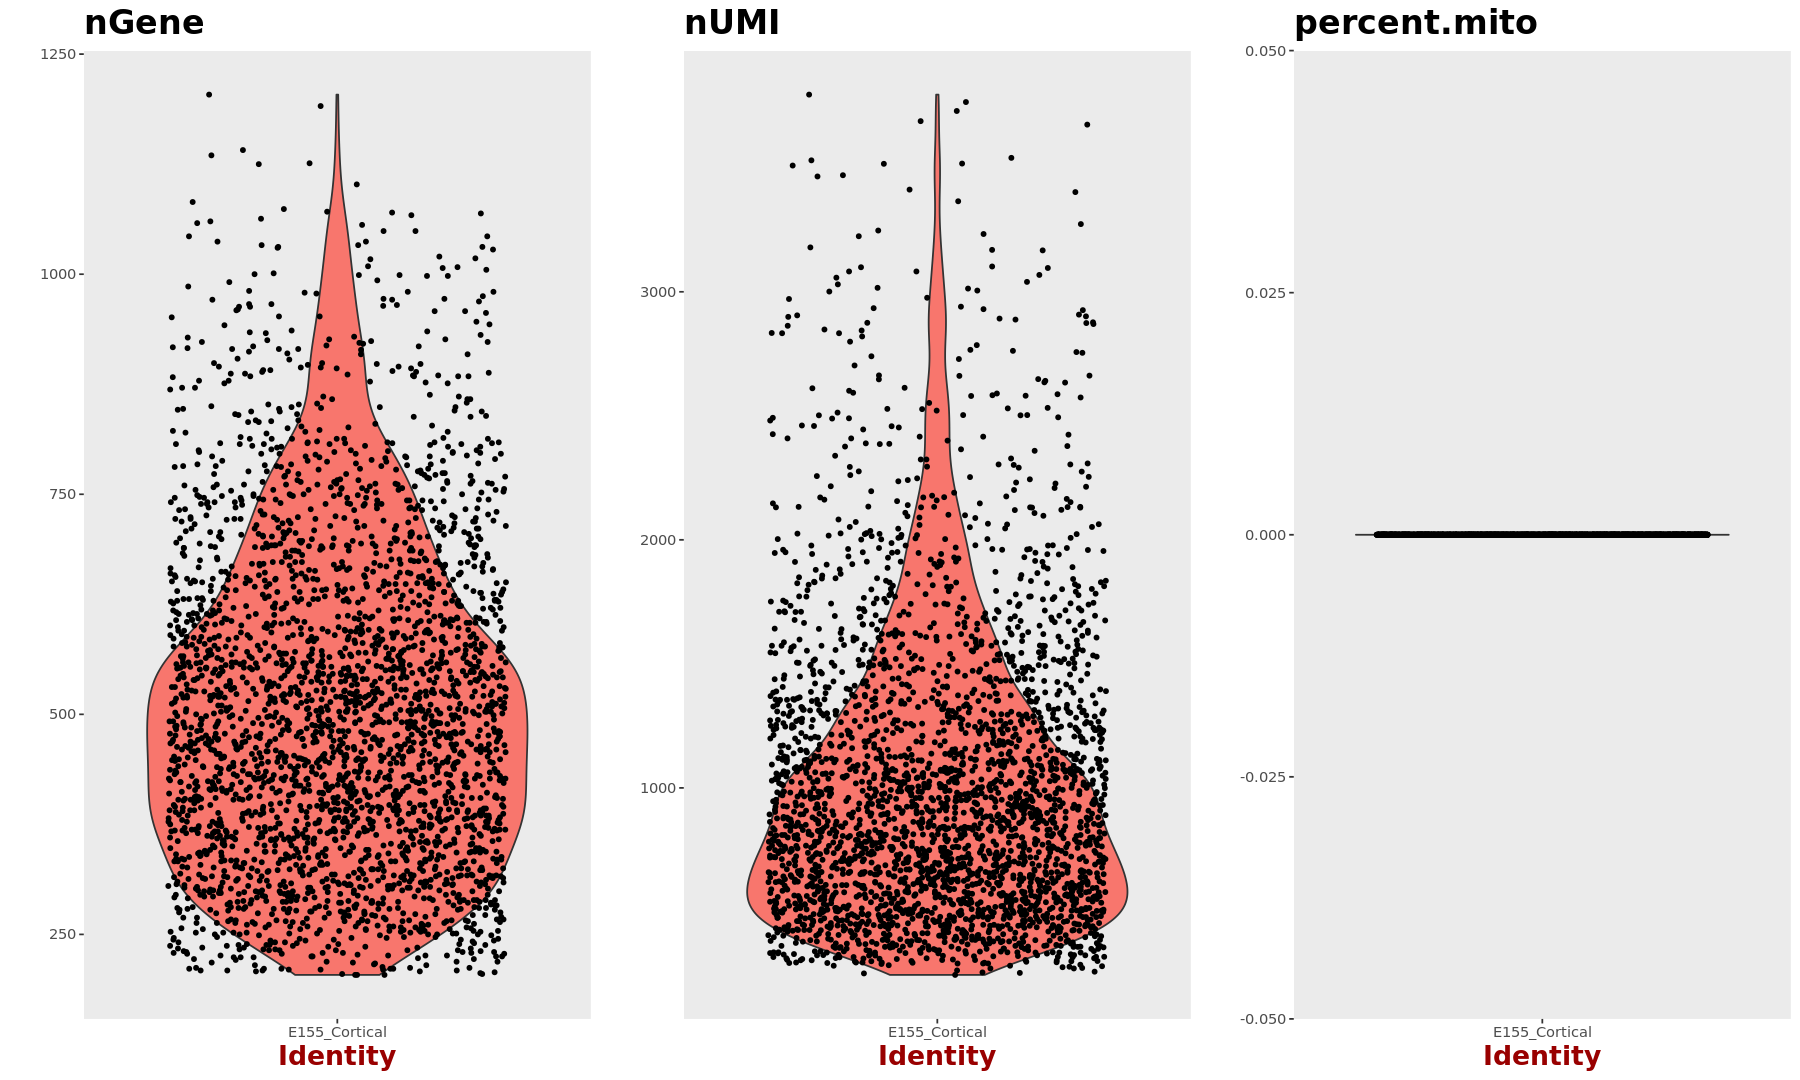

[1] "Regressing out nUMI"         "Regressing out percent.mito"
  |======================================================================| 100%
Time Elapsed:  11.6255338191986 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


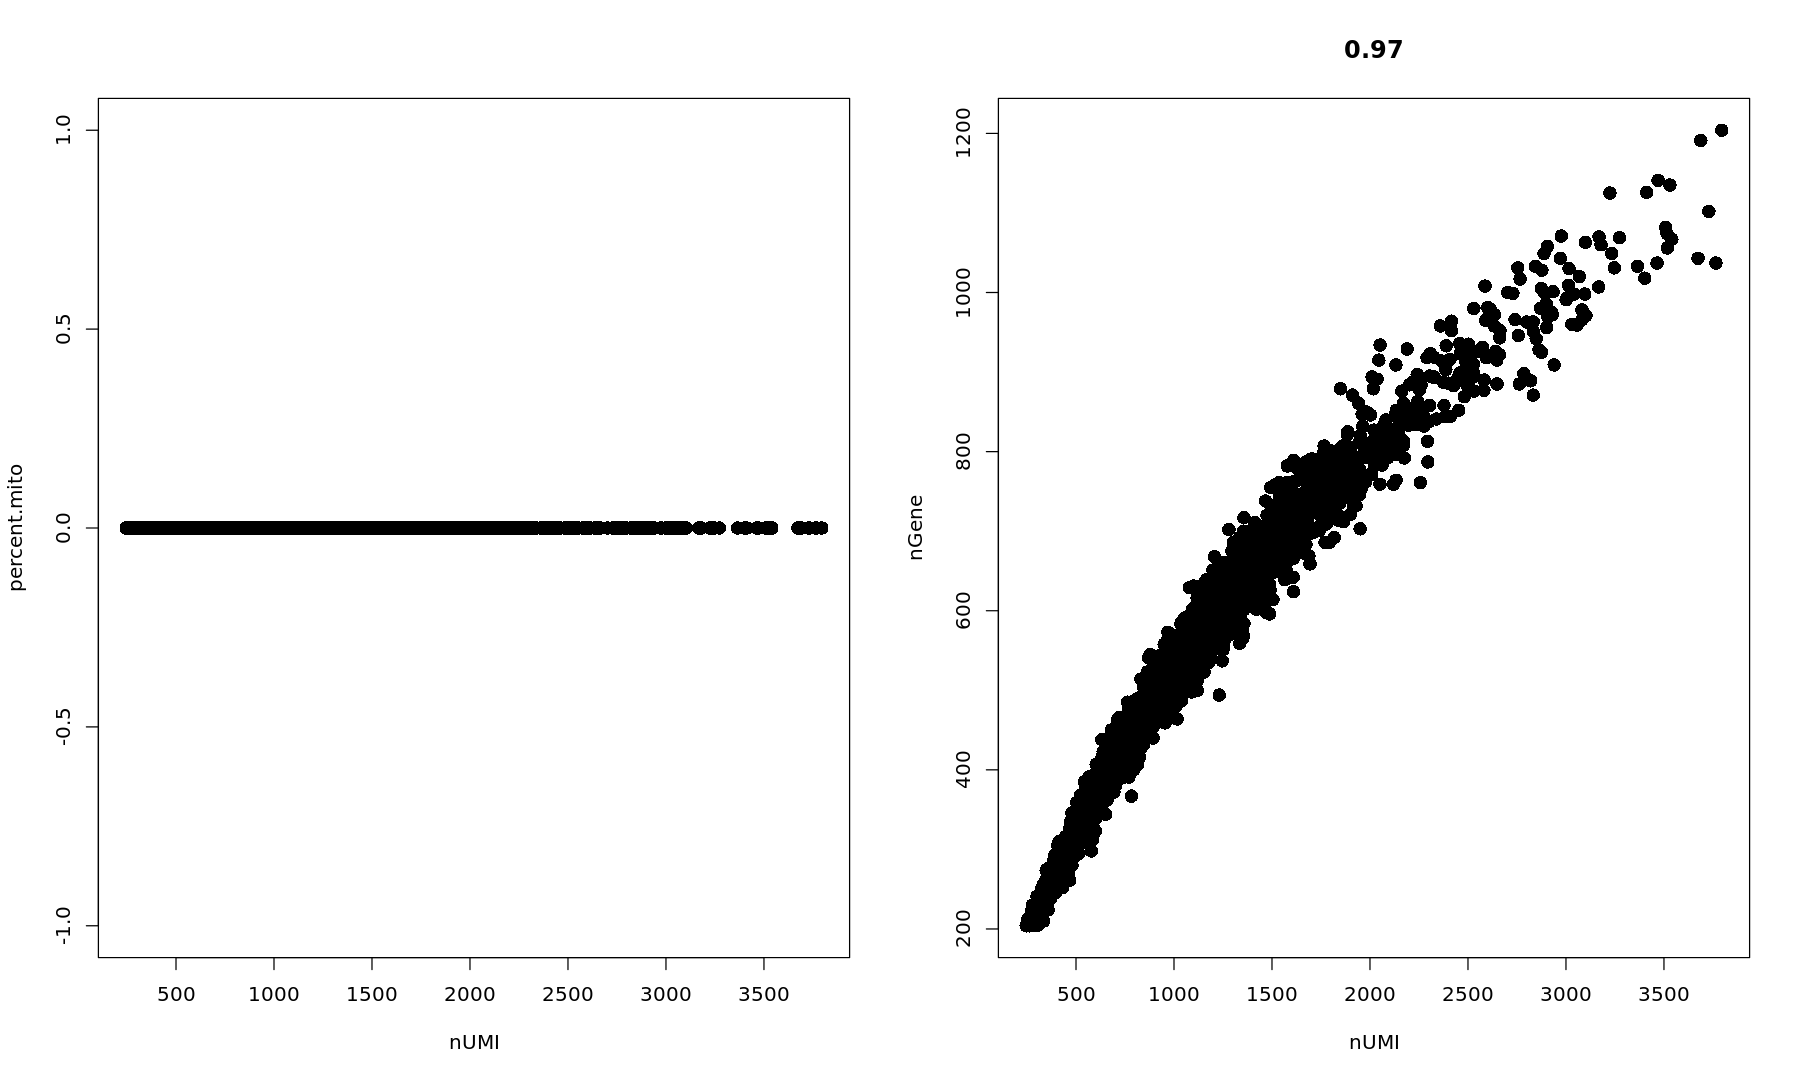

In [106]:
mito.genes <- grep(pattern = "^MT-", x = rownames(x = E155_Cortical_metabolic@data), value = TRUE)
percent.mito <- Matrix::colSums(E155_Cortical_metabolic@raw.data[mito.genes, ]) / Matrix::colSums(E155_Cortical_metabolic@raw.data)

# AddMetaData adds columns to object@meta.data, and is a great place to stash QC stats
E155_Cortical_metabolic <- AddMetaData(object = E155_Cortical_metabolic, metadata = percent.mito, col.name = "percent.mito")
VlnPlot(object = E155_Cortical_metabolic, features.plot = c("nGene", "nUMI", "percent.mito"), nCol = 3)


par(mfrow = c(1, 2))
GenePlot(object = E155_Cortical_metabolic, gene1 = "nUMI", gene2 = "percent.mito")
GenePlot(object = E155_Cortical_metabolic, gene1 = "nUMI", gene2 = "nGene")

E155_Cortical_metabolic <- FilterCells(object = E155_Cortical_metabolic, subset.names = c("nGene", "percent.mito"), low.thresholds = c(200, -Inf), high.thresholds = c(2500, 0.05))

E155_Cortical_metabolic <- NormalizeData(object = E155_Cortical_metabolic, normalization.method = "LogNormalize", scale.factor = 1e4)
E155_Cortical_metabolic <- ScaleData(object = E155_Cortical_metabolic, vars.to.regress = c("nUMI", "percent.mito"))

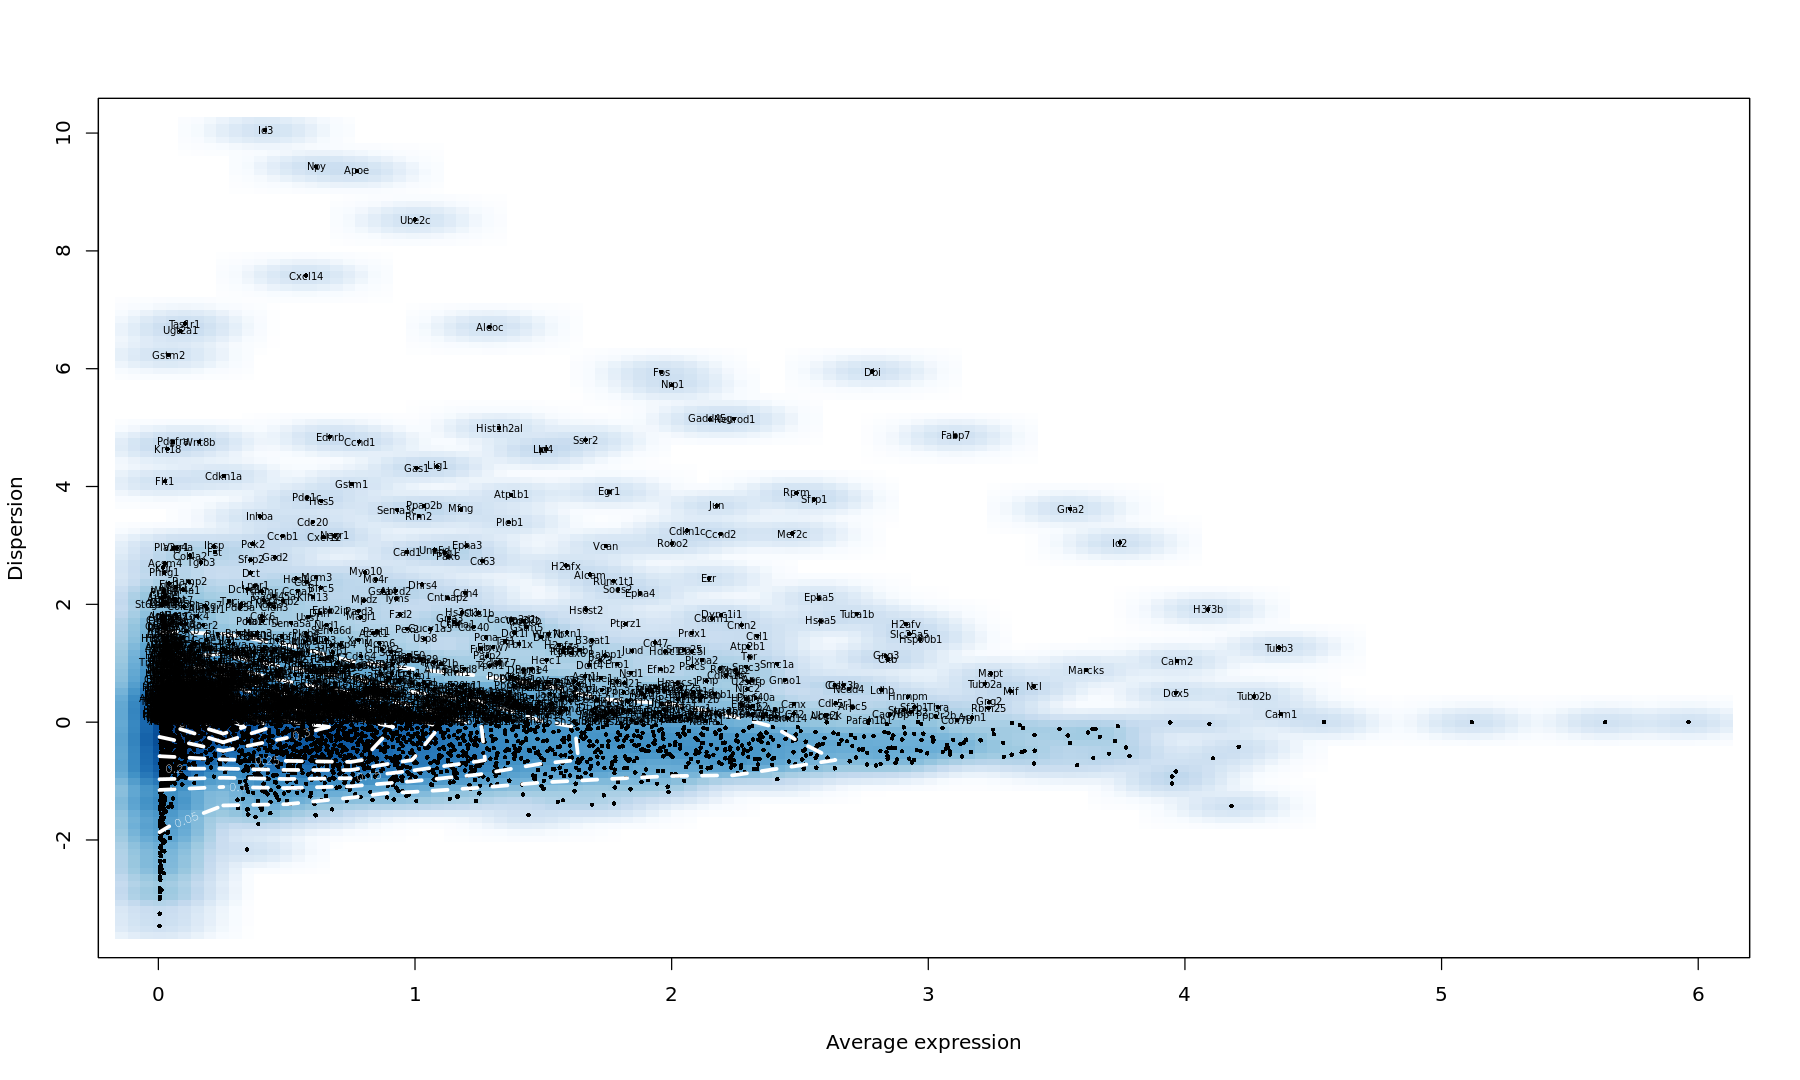

In [107]:
E155_Cortical_metabolic <- FindVariableGenes(object = E155_Cortical_metabolic, mean.function = ExpMean, dispersion.function = LogVMR, 
                                             x.low.cutoff = 0, x.high.cutoff = 8.0, y.cutoff = 0.01)

In [108]:
length(E155_Cortical_metabolic@var.genes)

[1] 1451

In [109]:
E155_Cortical_metabolic <- RunPCA(object = E155_Cortical_metabolic, pc.genes = E155_Cortical_metabolic@var.genes, 
                                  do.print = TRUE, pcs.print = 1:5, genes.print = 5)

[1] "PC1"
[1] "Tubb3"  "Mapt"   "Gng2"   "Tubb2b" "Thra"  
[1] ""
[1] "Dbi"   "Fabp7" "Aldoc" "Gas1"  "Pax6" 
[1] ""
[1] ""
[1] "PC2"
[1] "Neurod1" "Sstr2"   "Nrp1"    "Robo2"   "Unc5d"  
[1] ""
[1] "Dync1i1" "Cadm1"   "Mapt"    "Tubb2a"  "Mef2c"  
[1] ""
[1] ""
[1] "PC3"
[1] "Rprm"   "Cd63"   "Gsta4"  "Mfng"   "Atp1b1"
[1] ""
[1] "Birc5" "Ccna2" "Neil3" "Plk1"  "Sgol1"
[1] ""
[1] ""
[1] "PC4"
[1] "Plk1"  "Rprm"  "Sstr2" "Ube2c" "Hmmr" 
[1] ""
[1] "Mif"     "Cntn2"   "Aldoc"   "Ednrb"   "Aldh1l1"
[1] ""
[1] ""
[1] "PC5"
[1] "Cdc20"  "Ccnb1"  "Ube2c"  "Hmmr"   "Cdc25c"
[1] ""
[1] "Lig1"  "Ccne2" "Dhfr"  "Mcm6"  "Ung"  
[1] ""
[1] ""


### Finding clusters

In [110]:
E155_Cortical_metabolic_minclusters <- FindClusters(object = E155_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.3, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)

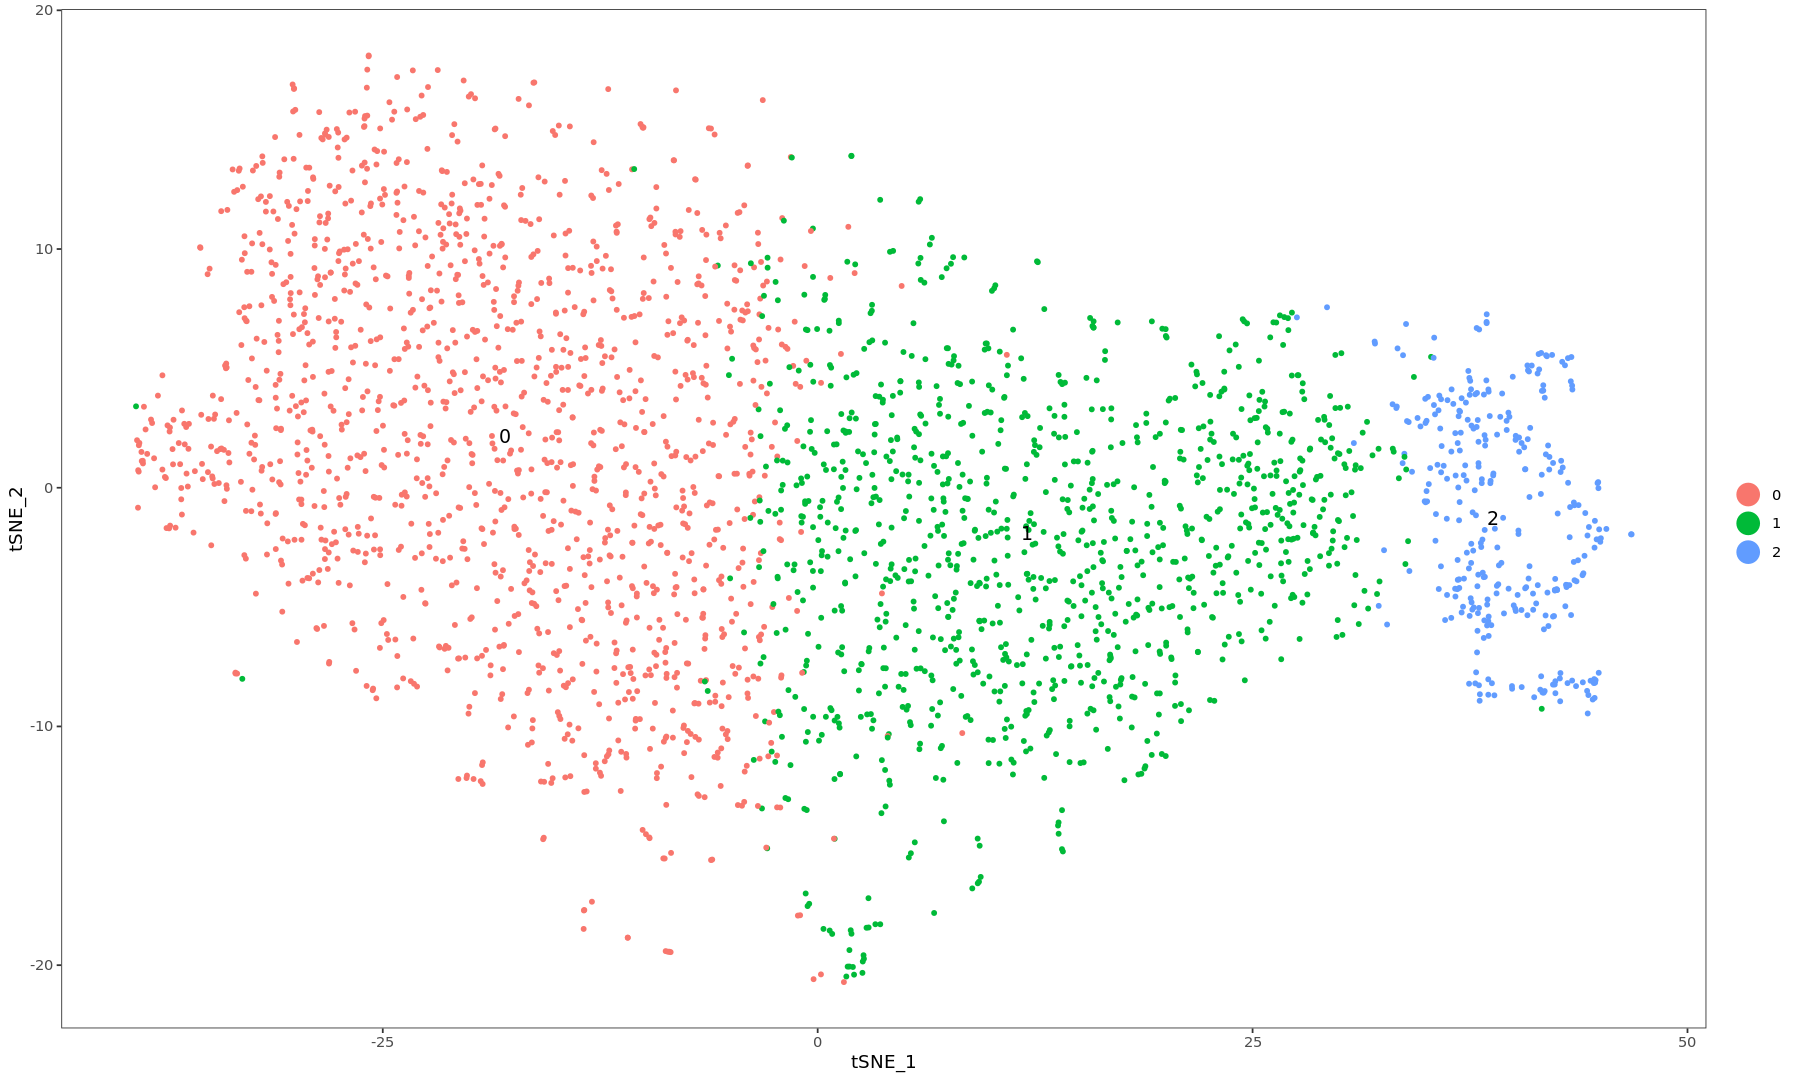

In [111]:
E155_Cortical_metabolic_minclusters <- RunTSNE(object = E155_Cortical_metabolic_minclusters, dims.use = 1:20, do.fast = TRUE)
TSNEPlot(object = E155_Cortical_metabolic_minclusters, do.label = T)

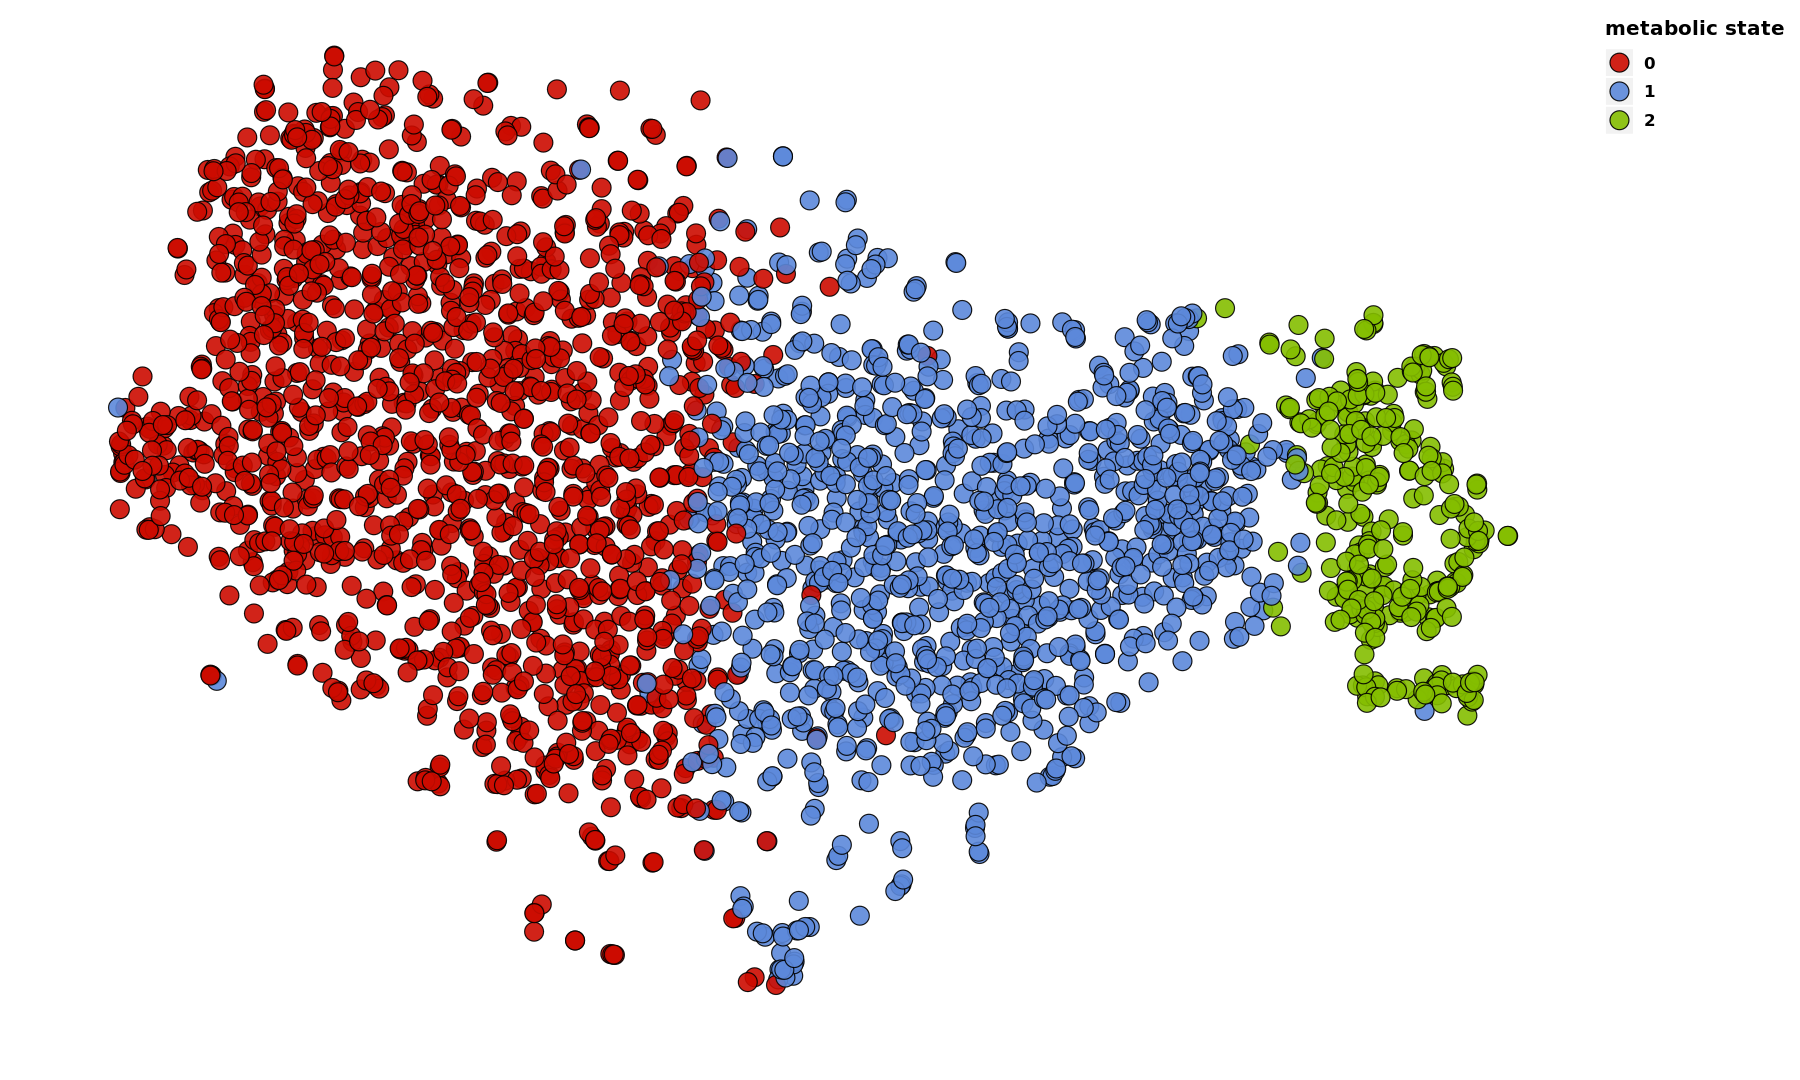

In [112]:
make_tsne_plot_Freda(E155_Cortical_metabolic_minclusters)

In [113]:
table(E155_Cortical_metabolic_minclusters@ident)


   0    1    2 
1487 1129  319 

In [114]:
saveRDS(E155_Cortical_metabolic_minclusters, "E155_Cortical_metabolic_minclusters.rds")

### Get 4,5,6 Clusters

In [115]:
E155_Cortical_metabolic_cluster_n4 <- FindClusters(object = E155_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.5, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E155_Cortical_metabolic_cluster_n4@ident)


  0   1   2   3 
911 867 838 319 

In [116]:
E155_Cortical_metabolic_cluster_n5 <- FindClusters(object = E155_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.7, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E155_Cortical_metabolic_cluster_n5@ident)


  0   1   2   3   4 
865 858 580 317 315 

In [117]:
E155_Cortical_metabolic_cluster_n6 <- FindClusters(object = E155_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.9, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E155_Cortical_metabolic_cluster_n6@ident)


  0   1   2   3   4   5 
721 566 515 499 317 317 

In [118]:
E155_overlap_minclusters <- get_overlap_df_two_clusters(E155_Cortical, E155_Cortical_metabolic_minclusters)
E155_overlap_minclusters

variable_cluster metabolic_cluster overlap  
1 Neurons          0                 67.642527
2 IPs              0                  0.000000
3 RPs              0                  0.000000
4 Neurons          1                 28.145865
5 IPs              1                 98.315789
6 RPs              1                  4.591837
7 Neurons          2                  4.211608
8 IPs              2                  1.684211
9 RPs              2                 95.408163

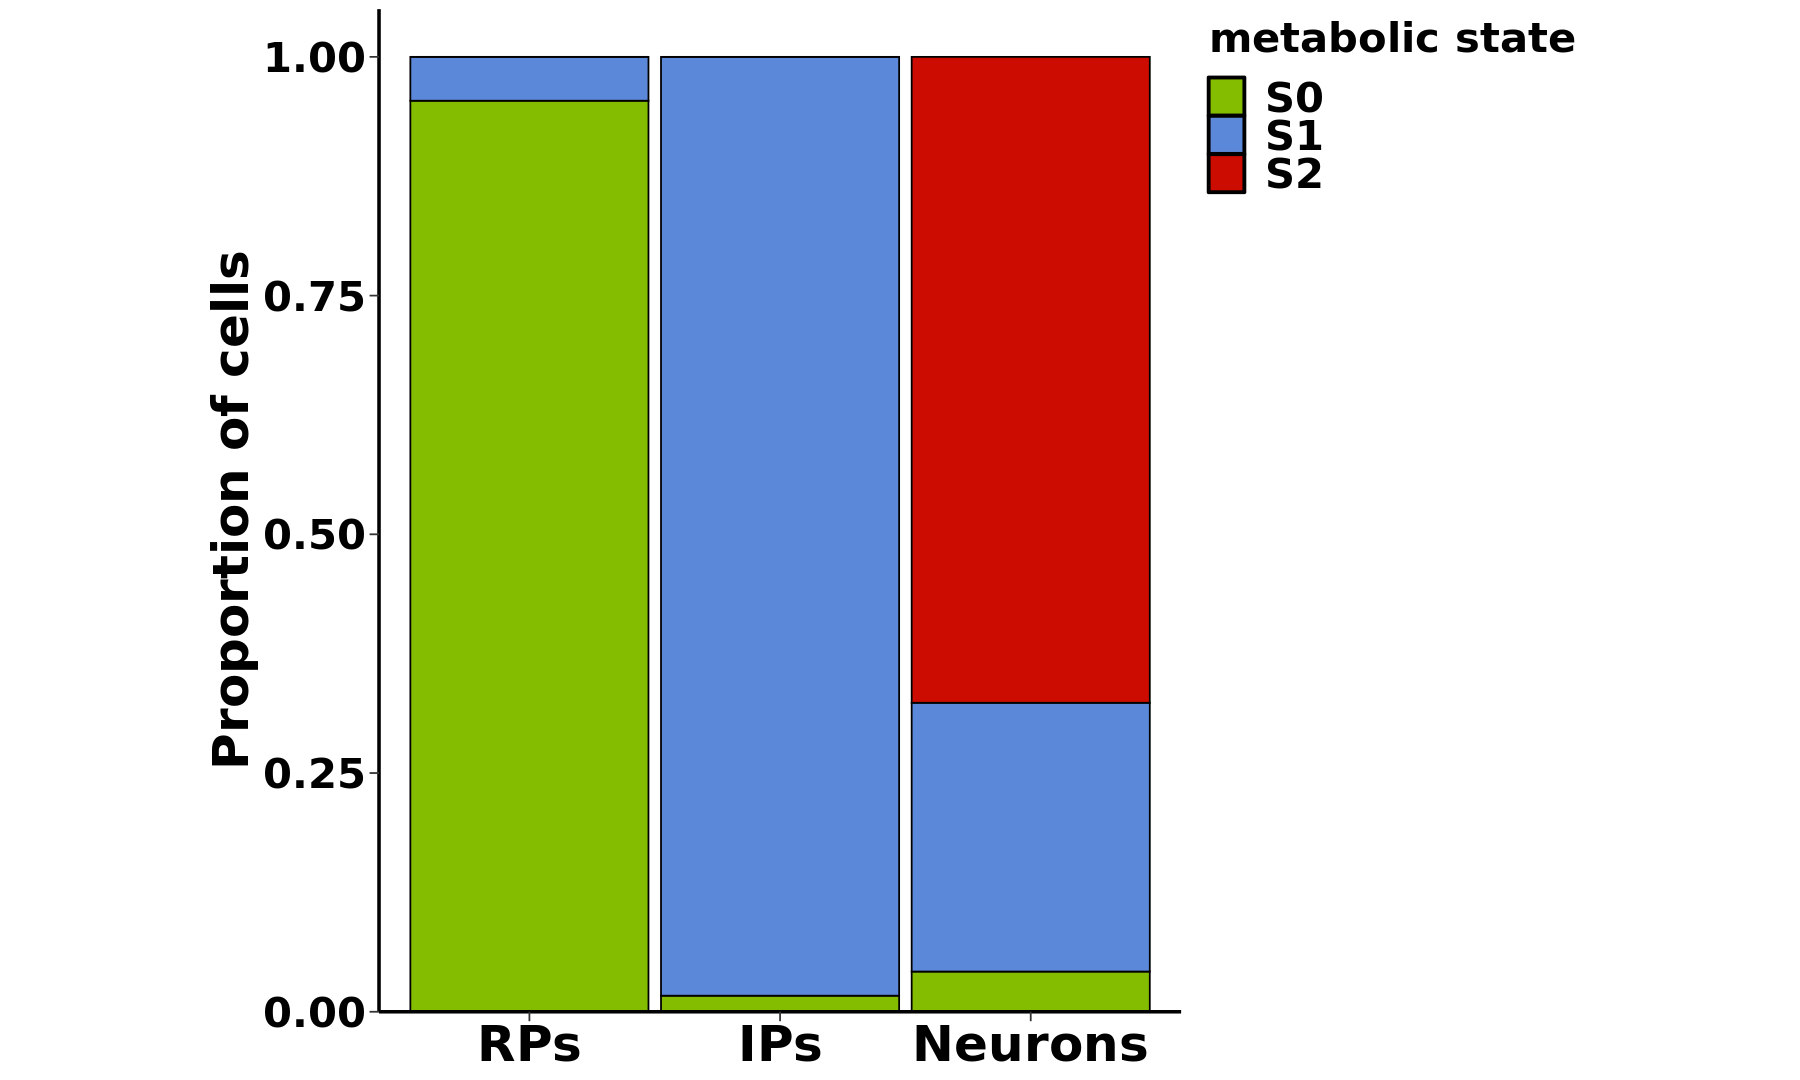

In [119]:
overlap_plot(E155_overlap_minclusters)

In [120]:
E155_overlap_df_n4 <- get_overlap_df_two_clusters(E155_Cortical, E155_Cortical_metabolic_cluster_n4)
E155_overlap_df_n4

variable_cluster metabolic_cluster overlap   
1  Neurons          0                 41.6538264
2  IPs              0                  0.4210526
3  RPs              0                  0.0000000
4  Neurons          1                 38.9830508
5  IPs              1                  0.0000000
6  RPs              1                  0.0000000
7  Neurons          2                 15.1515152
8  IPs              2                 97.8947368
9  RPs              2                  4.5918367
10 Neurons          3                  4.2116076
11 IPs              3                  1.6842105
12 RPs              3                 95.4081633

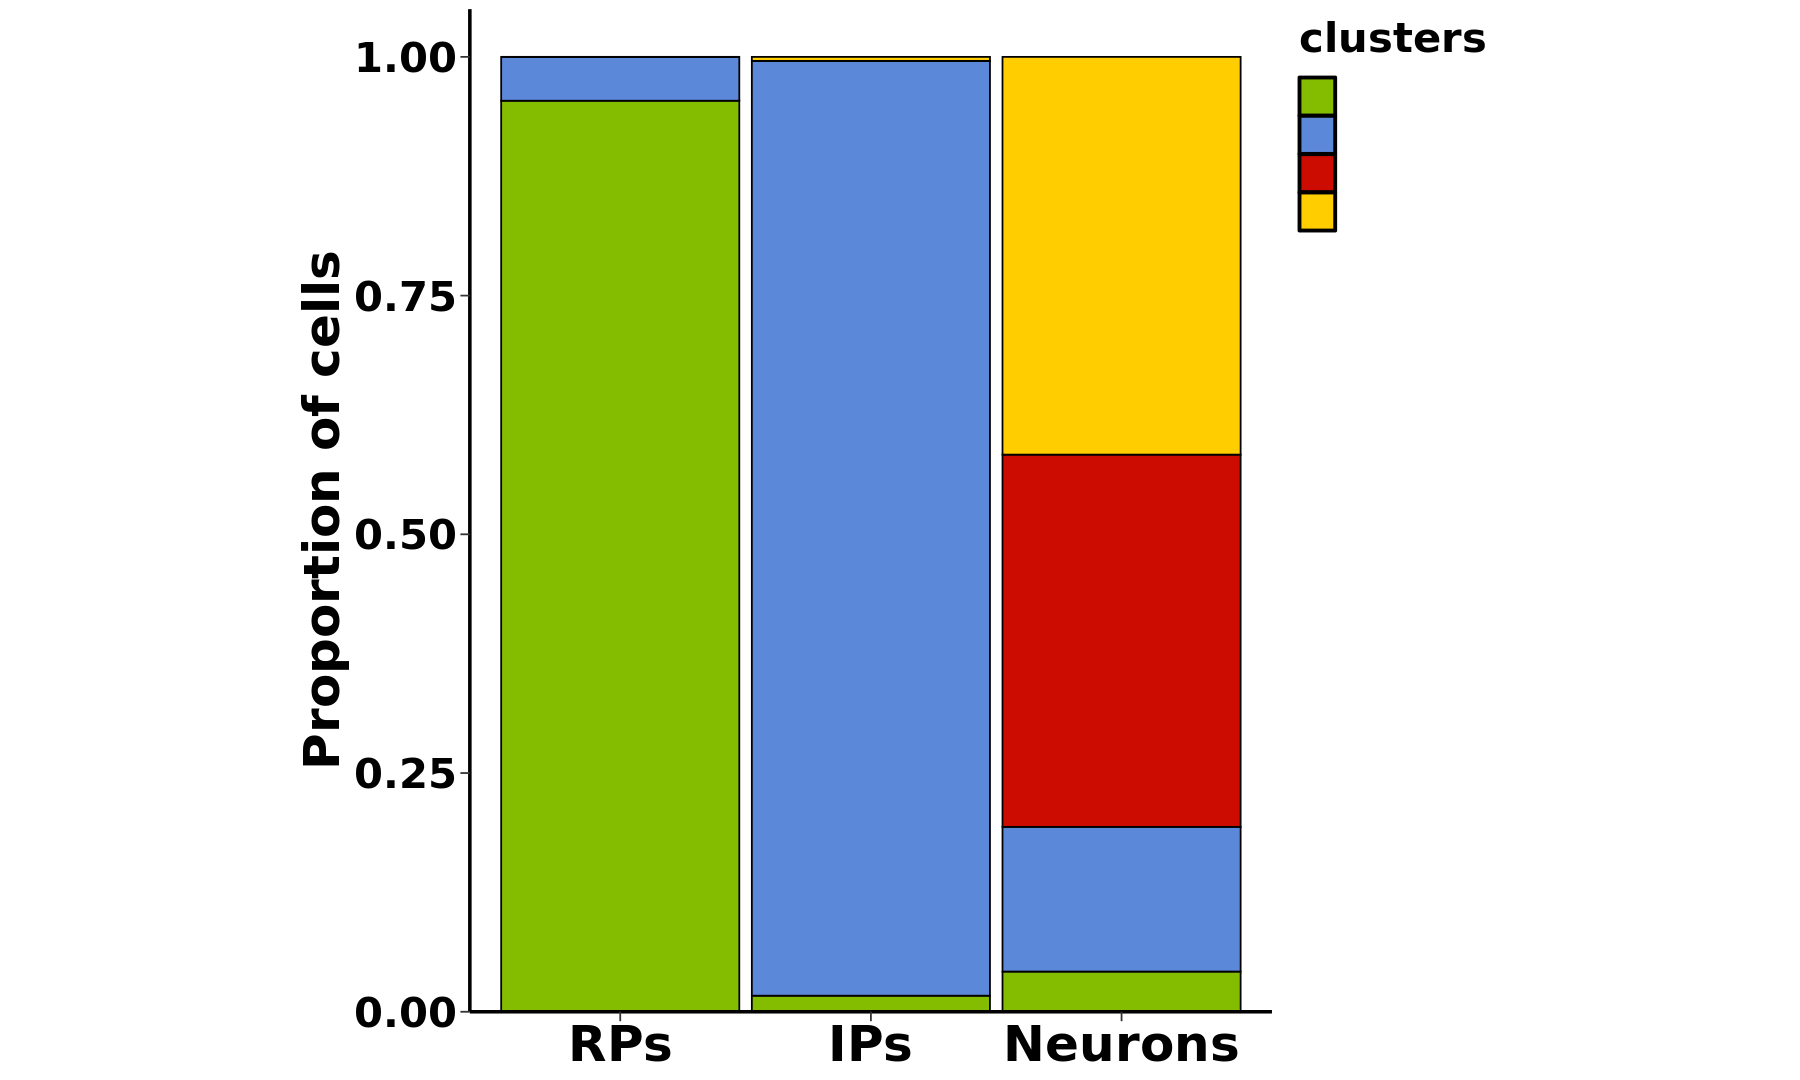

In [179]:
p <- overlap_plot(E155_overlap_df_n4, fill_list =  c("0" = pal_startrek("uniform")(7)[4], 
                                                "1" = pal_startrek("uniform")(7)[1], 
                                                "2" = pal_startrek("uniform")(7)[2],
                                                "3" = pal_startrek("uniform")(7)[3]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = ""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E15_celltype_n4.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

In [122]:
E155_overlap_df_n5 <- get_overlap_df_two_clusters(E155_Cortical, E155_Cortical_metabolic_cluster_n5)
E155_overlap_df_n5

variable_cluster metabolic_cluster overlap   
1  Neurons          0                 39.5993837
2  IPs              0                  0.4210526
3  RPs              0                  0.0000000
4  Neurons          1                 38.5721623
5  IPs              1                  0.0000000
6  RPs              1                  0.0000000
7  Neurons          2                 17.3086800
8  IPs              2                 39.7894737
9  RPs              2                  0.0000000
10 Neurons          3                  4.2116076
11 IPs              3                  1.4736842
12 RPs              3                 94.8979592
13 Neurons          4                  0.3081664
14 IPs              4                 58.3157895
15 RPs              4                  5.1020408

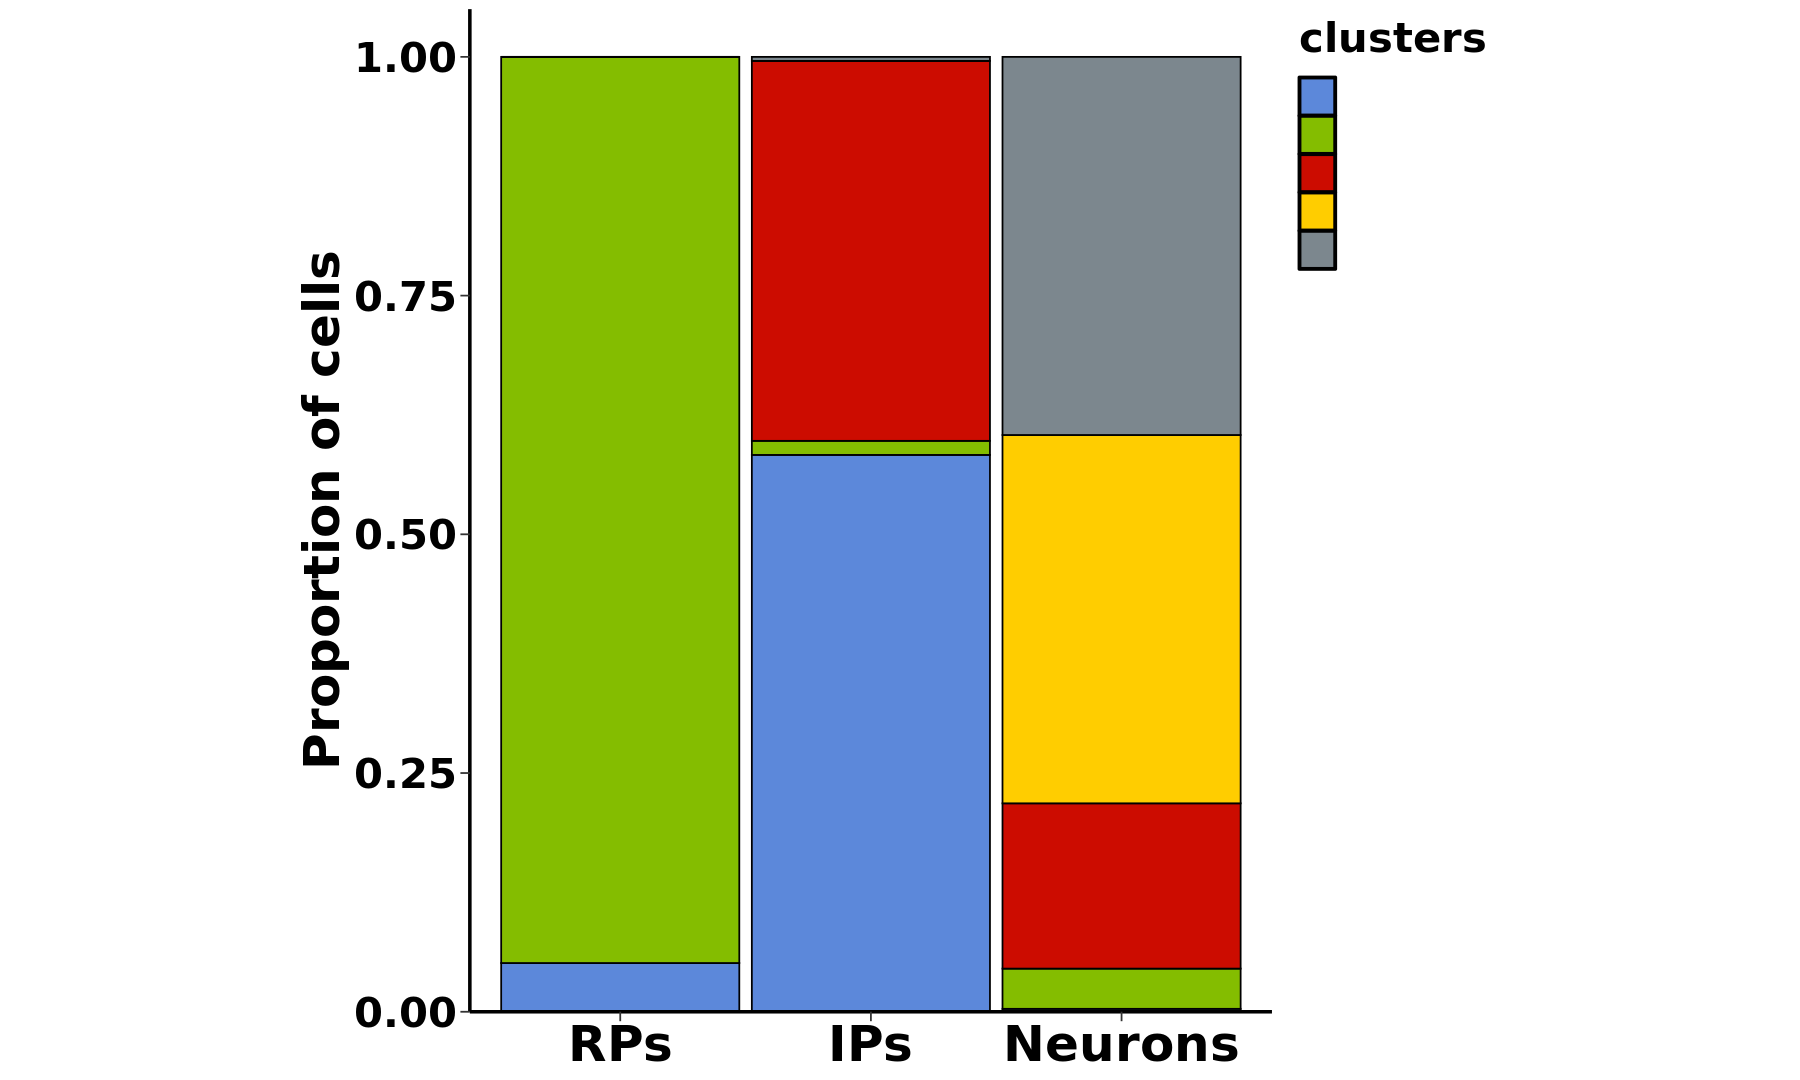

In [182]:
p <- overlap_plot(E155_overlap_df_n5, fill_list =  c("0" = pal_startrek("uniform")(7)[5], 
                                                "1" = pal_startrek("uniform")(7)[4], 
                                                "2" = pal_startrek("uniform")(7)[1],
                                                "3" = pal_startrek("uniform")(7)[3],
                                                 "4" = pal_startrek("uniform")(7)[2]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = "", "4"=""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E15_celltype_n5.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

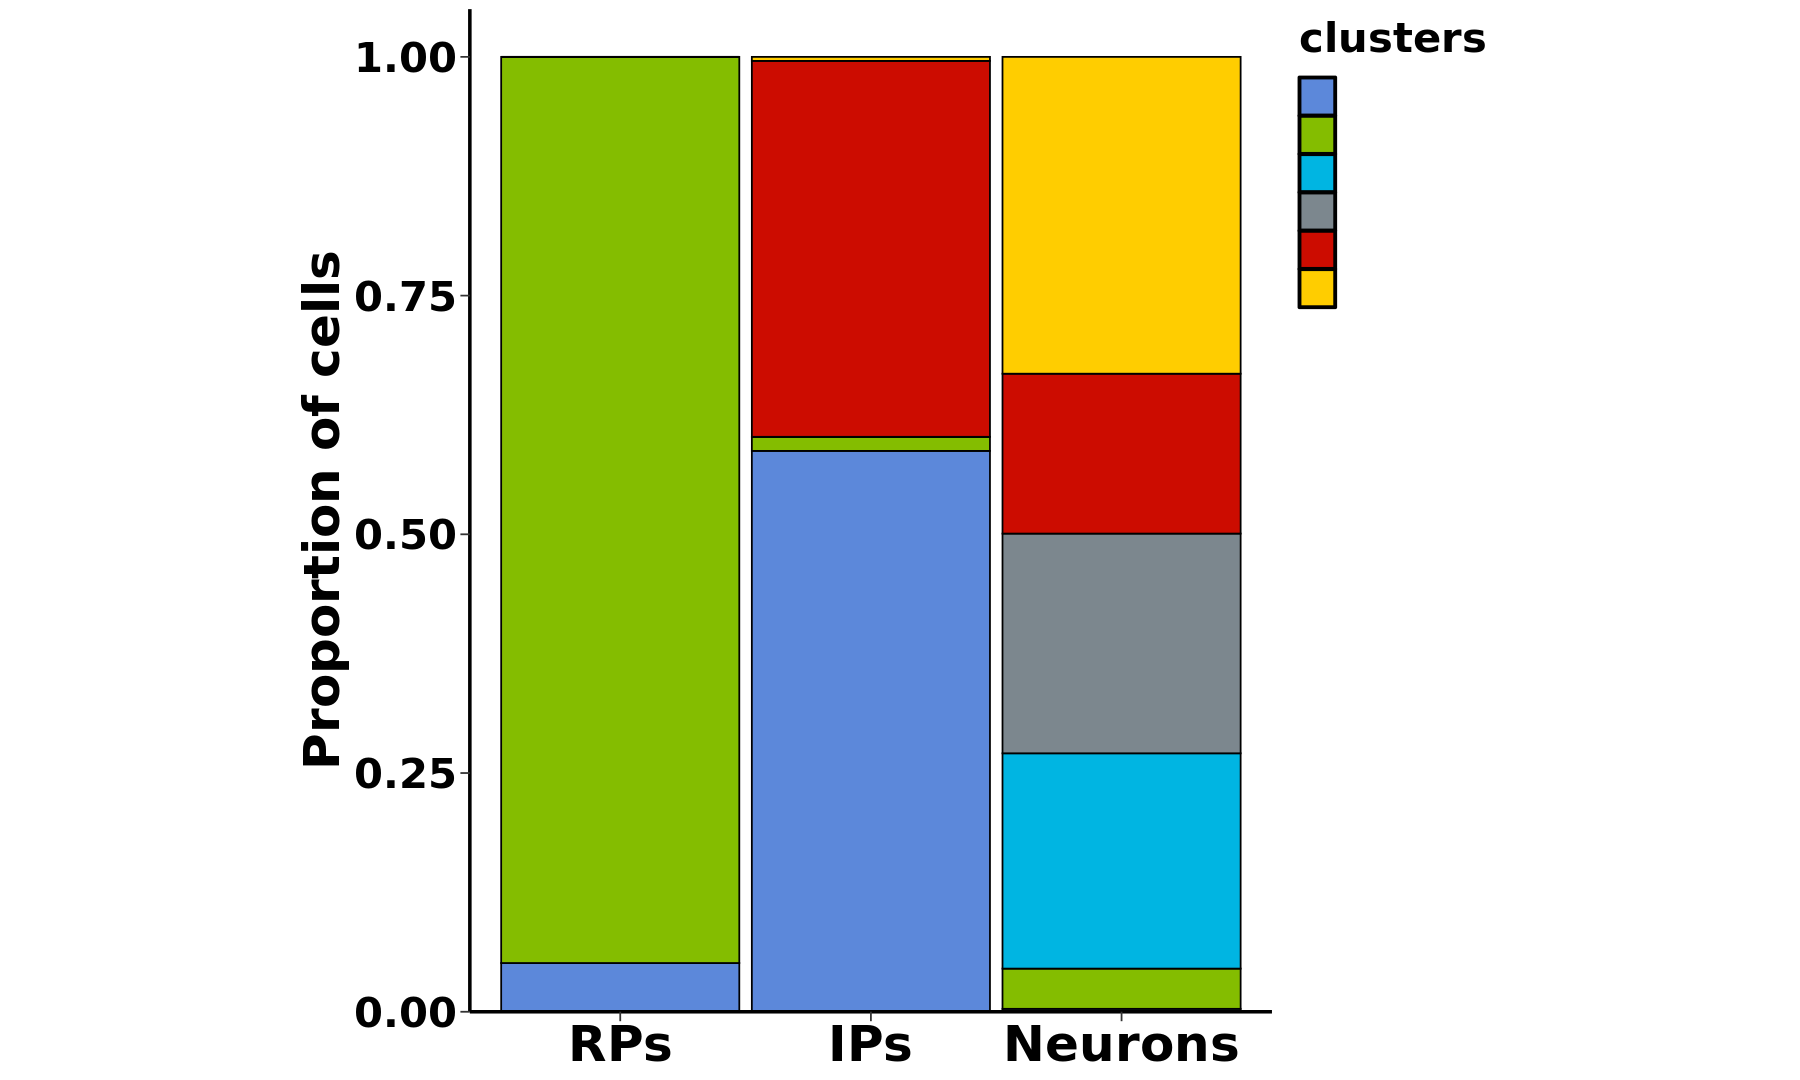

In [186]:
E155_overlap_df_n6 <-  get_overlap_df_two_clusters(E155_Cortical, E155_Cortical_metabolic_cluster_n6)
p <- overlap_plot(E155_overlap_df_n6, fill_list =  c("0" = pal_startrek("uniform")(7)[4], 
                                                "1" = pal_startrek("uniform")(7)[1], 
                                                "2" = pal_startrek("uniform")(7)[5],
                                                "3" = pal_startrek("uniform")(7)[6],
                                                 "4" = pal_startrek("uniform")(7)[3],
                                                 "5" = pal_startrek("uniform")(7)[2]),
                                label_vals = c("0" = "",  "1" = "", "2" = "", "3" = "", "4" = "", "5" = ""), 
                                 legend_label = "clusters")
ggsave("cluster_barplots/E15_celltype_n6.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

## 17th day metabolic genes analysis

### Read the 17th day Seurat object from previous analysis

In [125]:
E175_Cortical <- readRDS("E175_Cortical.rds")

### Read 17th day data

In [126]:
E175_Cortical_data <- read.table("GSM2861514_E175_Only_Cortical_Cells_DGE.txt",sep= "\t", header=TRUE, row.names=1)

### Take only metabolic genes from the data

In [127]:
E175_Cortical_metabolomic_data <- E175_Cortical_data[rownames(E175_Cortical_data)[rownames(E175_Cortical_data) %in% metabolic_genes],]
dim(E175_Cortical_metabolomic_data)

[1] 3772  880

### Create Seurat object using the metabolic gene subset of the data

In [128]:
E175_Cortical_metabolic <- CreateSeuratObject(raw.data = E175_Cortical_metabolomic_data, 
                                              min.cells = 3, min.genes = 200, project = "E175_Cortical")

### Run the preprocessing Seurat steps

Warning message in SingleVlnPlot(feature = x, data = data.use[, x, drop = FALSE], :
“All cells have the same value of feature.”
Warning message in cor(x = data.plot$x, y = data.plot$y):
“the standard deviation is zero”


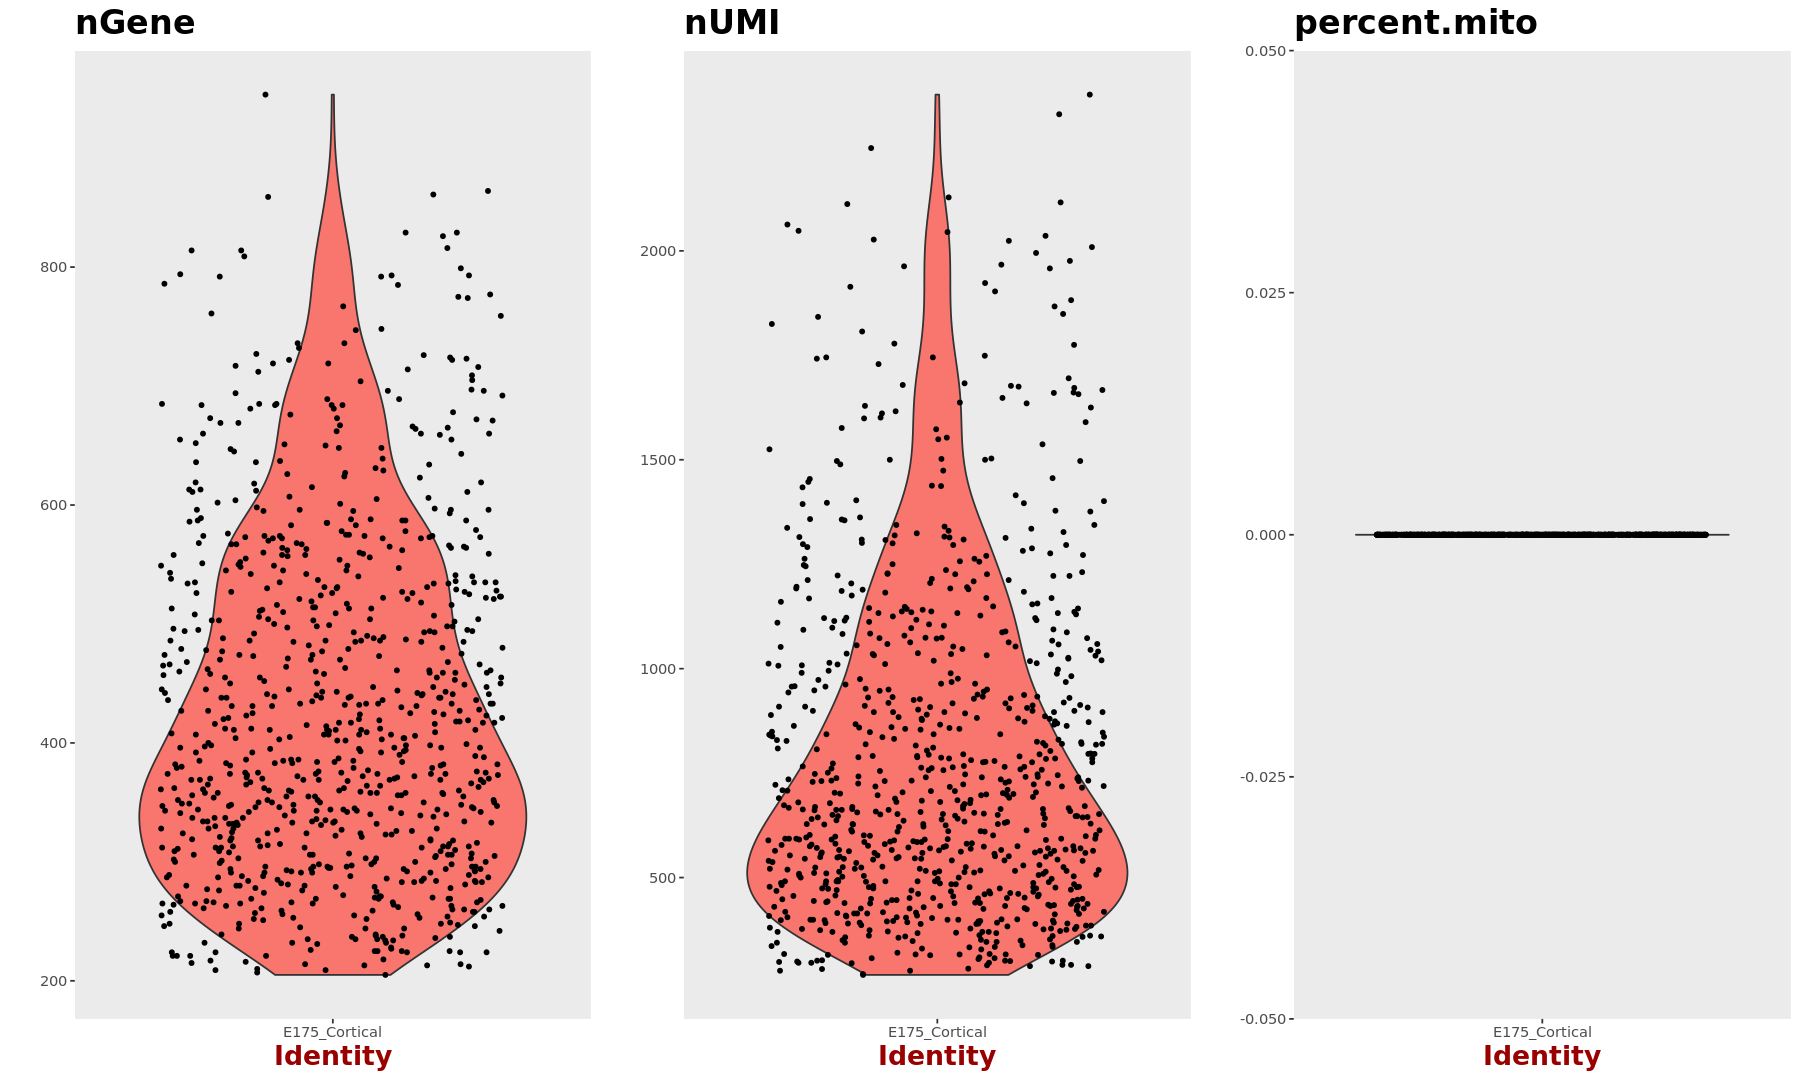

[1] "Regressing out nUMI"         "Regressing out percent.mito"
  |======================================================================| 100%
Time Elapsed:  7.9101026058197 secs
[1] "Scaling data matrix"
  |======================================================================| 100%


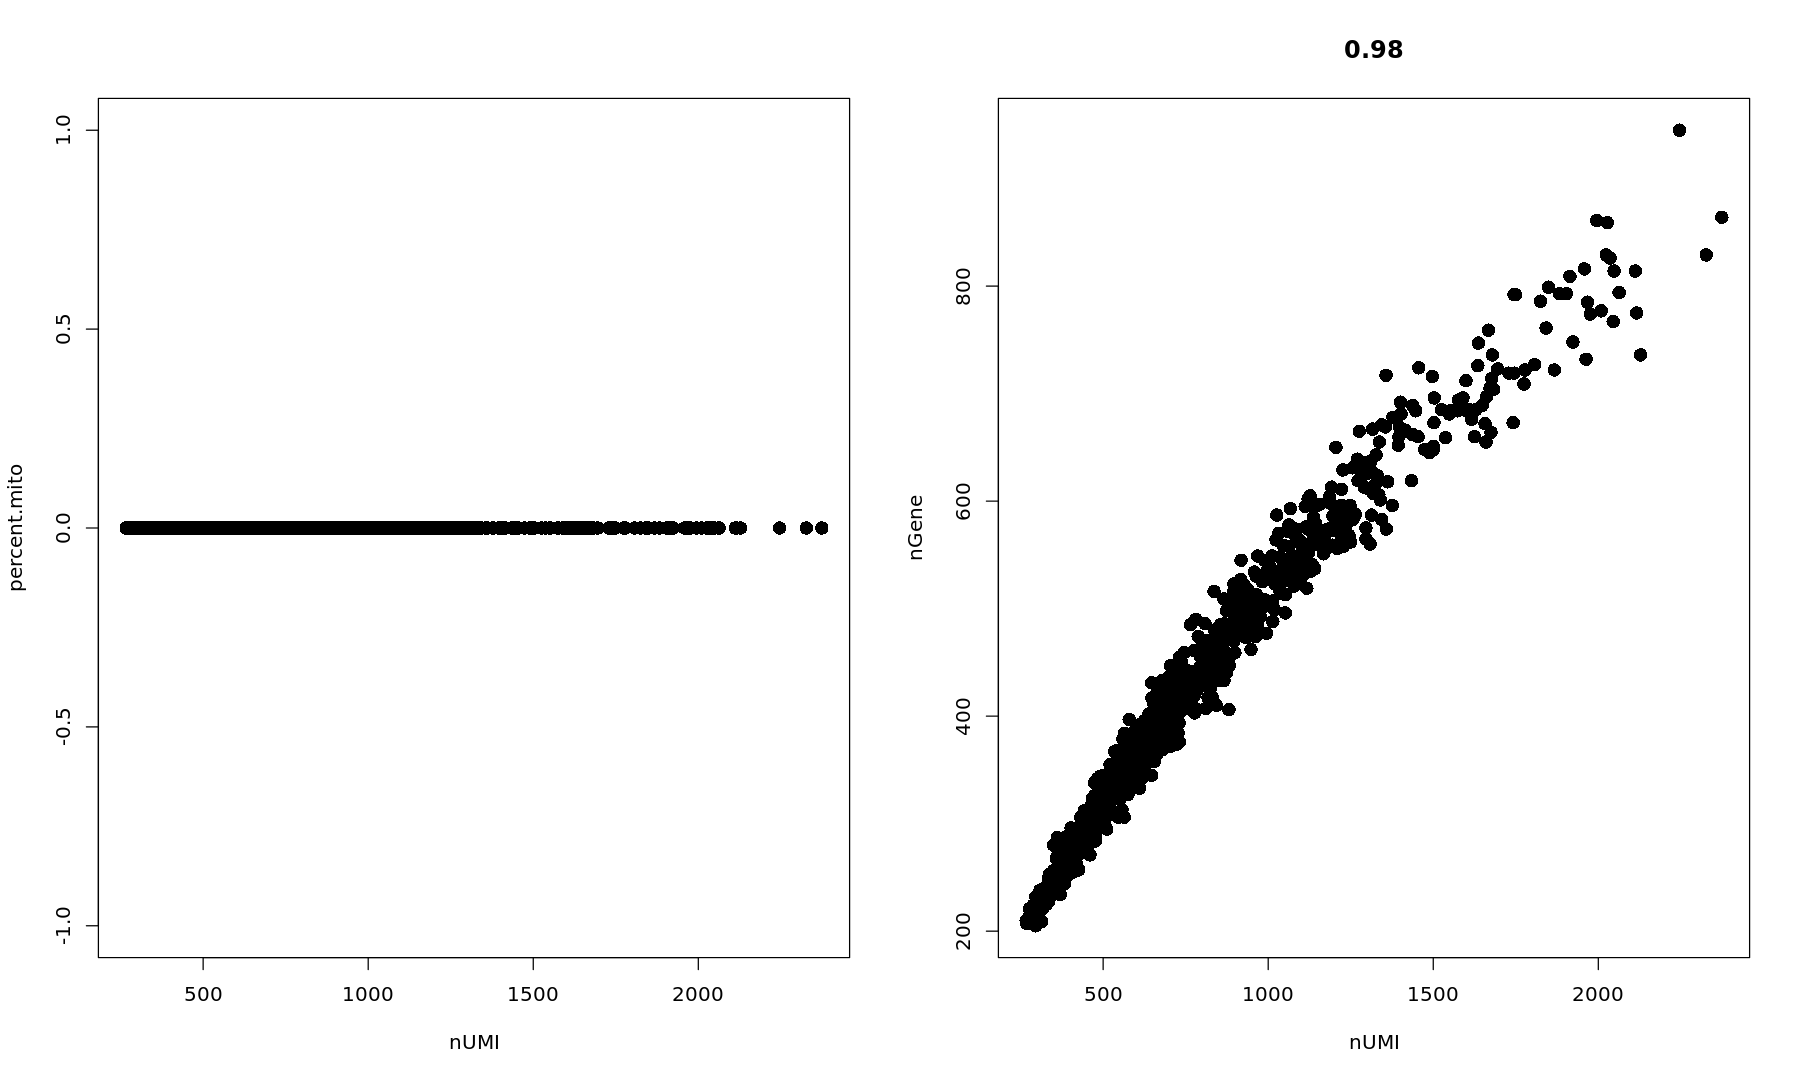

In [129]:
mito.genes <- grep(pattern = "^MT-", x = rownames(x = E175_Cortical_metabolic@data), value = TRUE)
percent.mito <- Matrix::colSums(E175_Cortical_metabolic@raw.data[mito.genes, ]) / Matrix::colSums(E175_Cortical_metabolic@raw.data)

E175_Cortical_metabolic <- AddMetaData(object = E175_Cortical_metabolic, metadata = percent.mito, col.name = "percent.mito")
VlnPlot(object = E175_Cortical_metabolic, features.plot = c("nGene", "nUMI", "percent.mito"), nCol = 3)

par(mfrow = c(1, 2))
GenePlot(object = E175_Cortical_metabolic, gene1 = "nUMI", gene2 = "percent.mito")
GenePlot(object = E175_Cortical_metabolic, gene1 = "nUMI", gene2 = "nGene")

E175_Cortical_metabolic <- FilterCells(object = E175_Cortical_metabolic, subset.names = c("nGene", "percent.mito"), low.thresholds = c(200, -Inf), high.thresholds = c(2500, 0.05))

E175_Cortical_metabolic <- NormalizeData(object = E175_Cortical_metabolic, normalization.method = "LogNormalize", scale.factor = 1e4)
E175_Cortical_metabolic <- ScaleData(object = E175_Cortical_metabolic, vars.to.regress = c("nUMI", "percent.mito"))

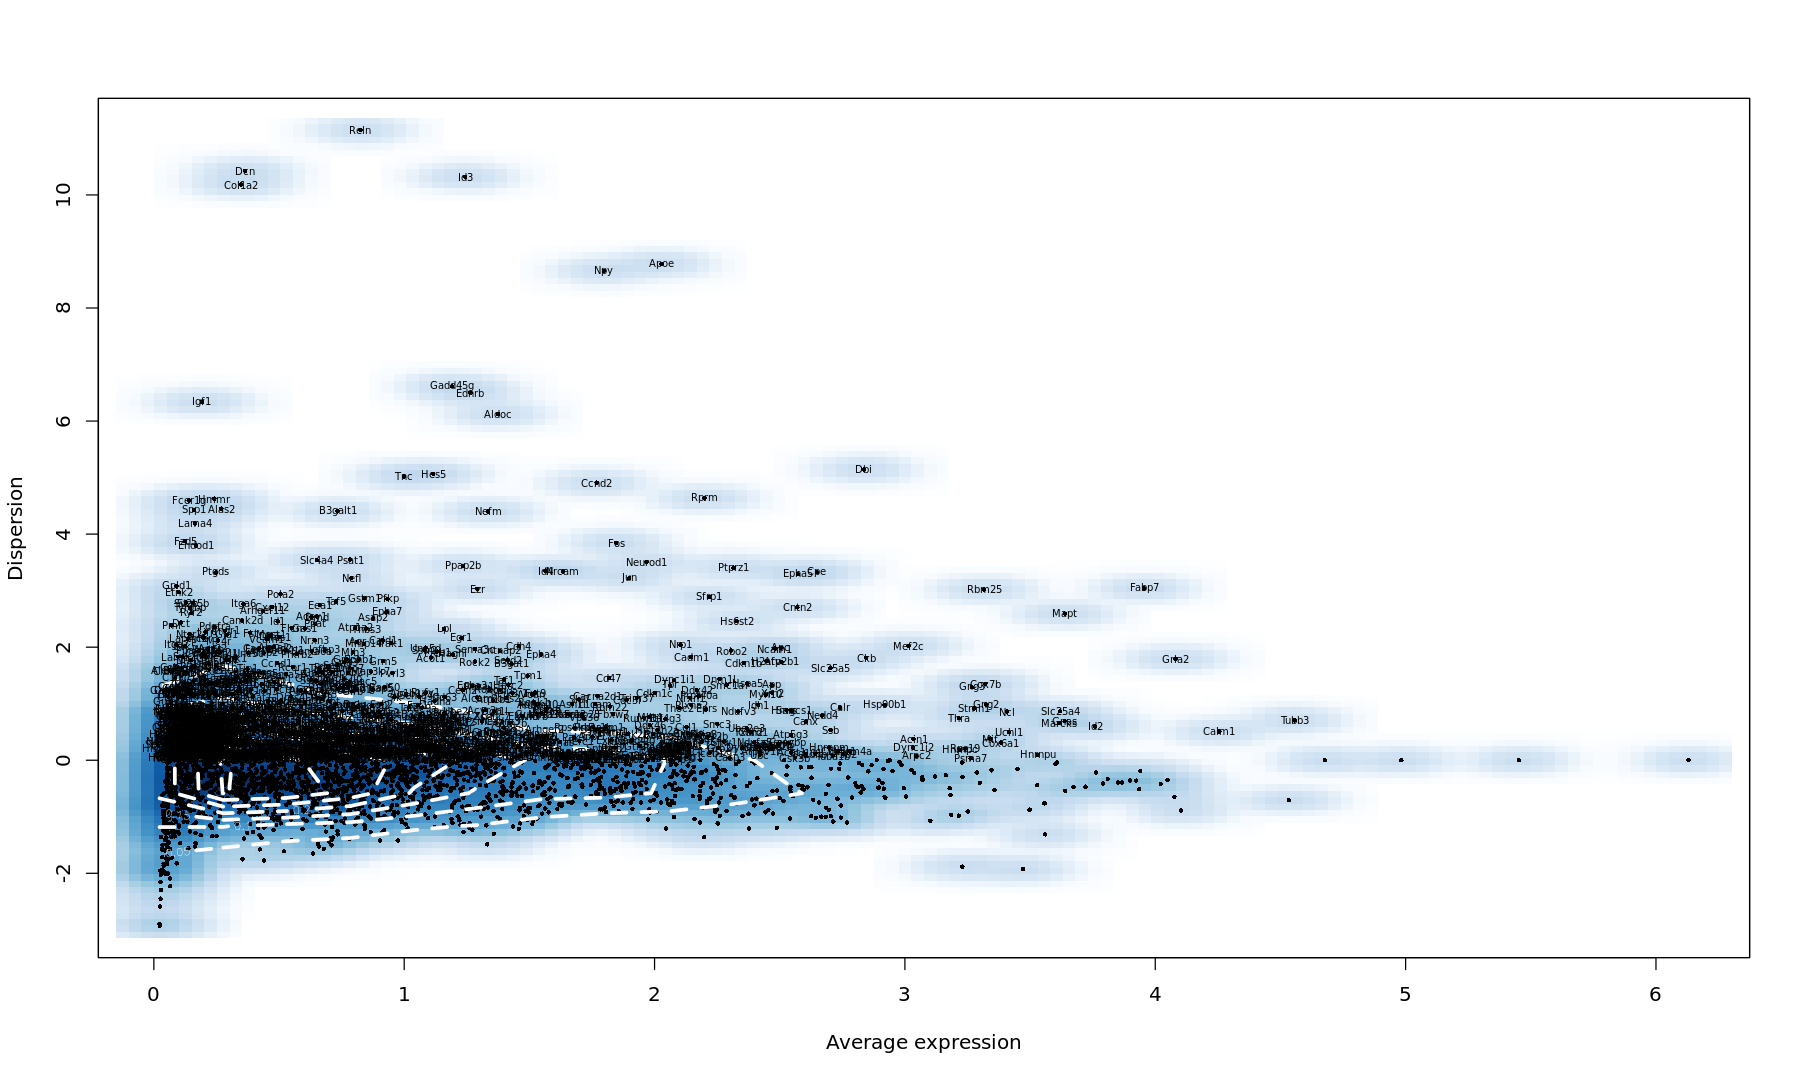

In [130]:
E175_Cortical_metabolic <- FindVariableGenes(object = E175_Cortical_metabolic, mean.function = ExpMean, dispersion.function = LogVMR, 
                                             x.low.cutoff = 0, x.high.cutoff = 8.0, y.cutoff = 0.01)

In [131]:
length(E175_Cortical_metabolic@var.genes)

[1] 1234

In [132]:
E175_Cortical_metabolic <- RunPCA(object = E175_Cortical_metabolic, pc.genes = E175_Cortical_metabolic@var.genes, 
                                  do.print = TRUE, pcs.print = 1:5, genes.print = 5)

[1] "PC1"
[1] "Fabp7" "Aldoc" "Ednrb" "Apoe"  "Tnc"  
[1] ""
[1] "Tubb3" "Mapt"  "Uchl1" "Gria2" "Stmn1"
[1] ""
[1] ""
[1] "PC2"
[1] "Rps19"  "Sstr2"  "H2afv"  "Cdkn1b" "Hnrnpc"
[1] ""
[1] "Pfkp"   "Igfbp3" "Ntrk2"  "B3gat1" "Gabra3"
[1] ""
[1] ""
[1] "PC3"
[1] "Mef2c"   "Gucy1a3" "Dync1i1" "Hmgcs1"  "Mapt"   
[1] ""
[1] "Sstr2"    "Sema3c"   "Mfng"     "Cacna2d2" "Pax6"    
[1] ""
[1] ""
[1] "PC4"
[1] "Aqp4"   "Rhoq"   "Itpr2"  "Pla2g7" "Slc4a4"
[1] ""
[1] "Ccnd1" "Mcm3"  "Gas1"  "Tk1"   "Dhfr" 
[1] ""
[1] ""
[1] "PC5"
[1] "Man2a1" "Cxcl12" "Pmaip1" "Ppard"  "Igf1"  
[1] ""
[1] "Ptprz1" "Gria2"  "Thbs3"  "Gas1"   "Abcb9" 
[1] ""
[1] ""


### Find clusters

In [133]:
E175_Cortical_metabolic_minclusters <- FindClusters(object = E175_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.4, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)

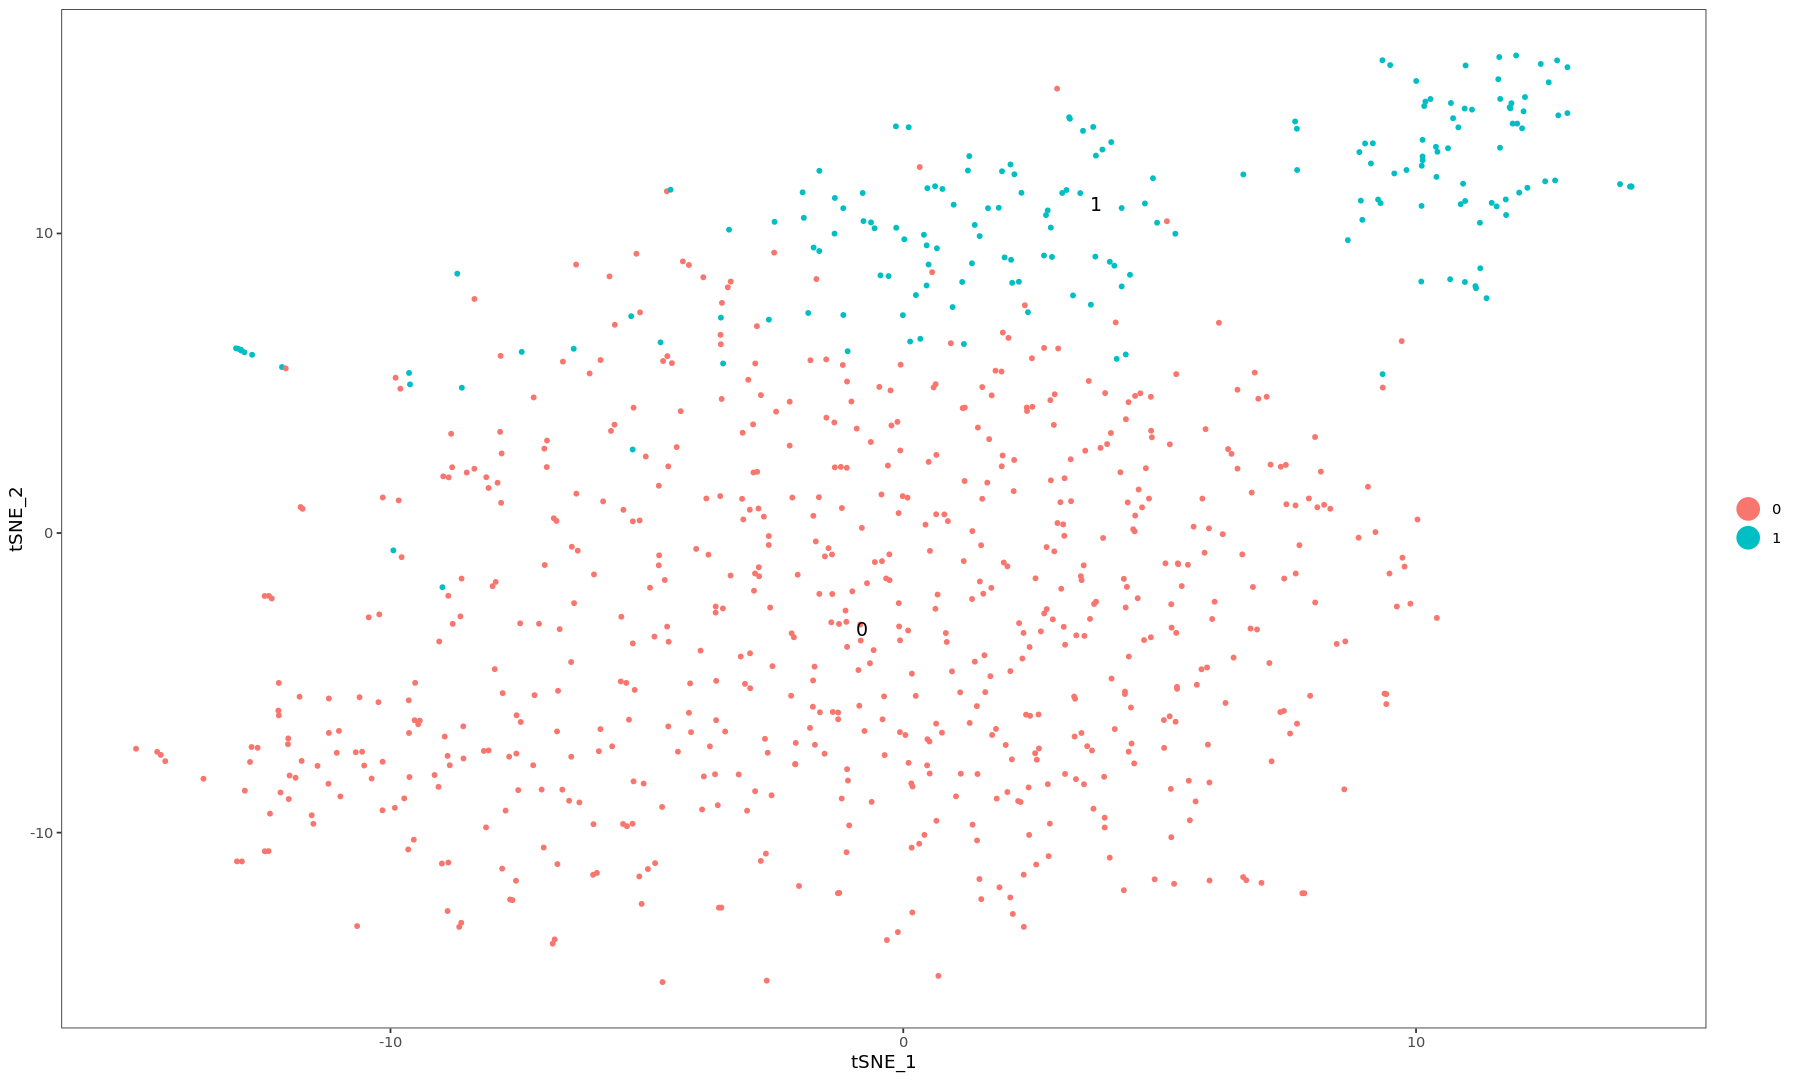

In [134]:
E175_Cortical_metabolic_minclusters <- RunTSNE(object = E175_Cortical_metabolic_minclusters, dims.use = 1:20, do.fast = TRUE)
TSNEPlot(object = E175_Cortical_metabolic_minclusters, do.label = T)

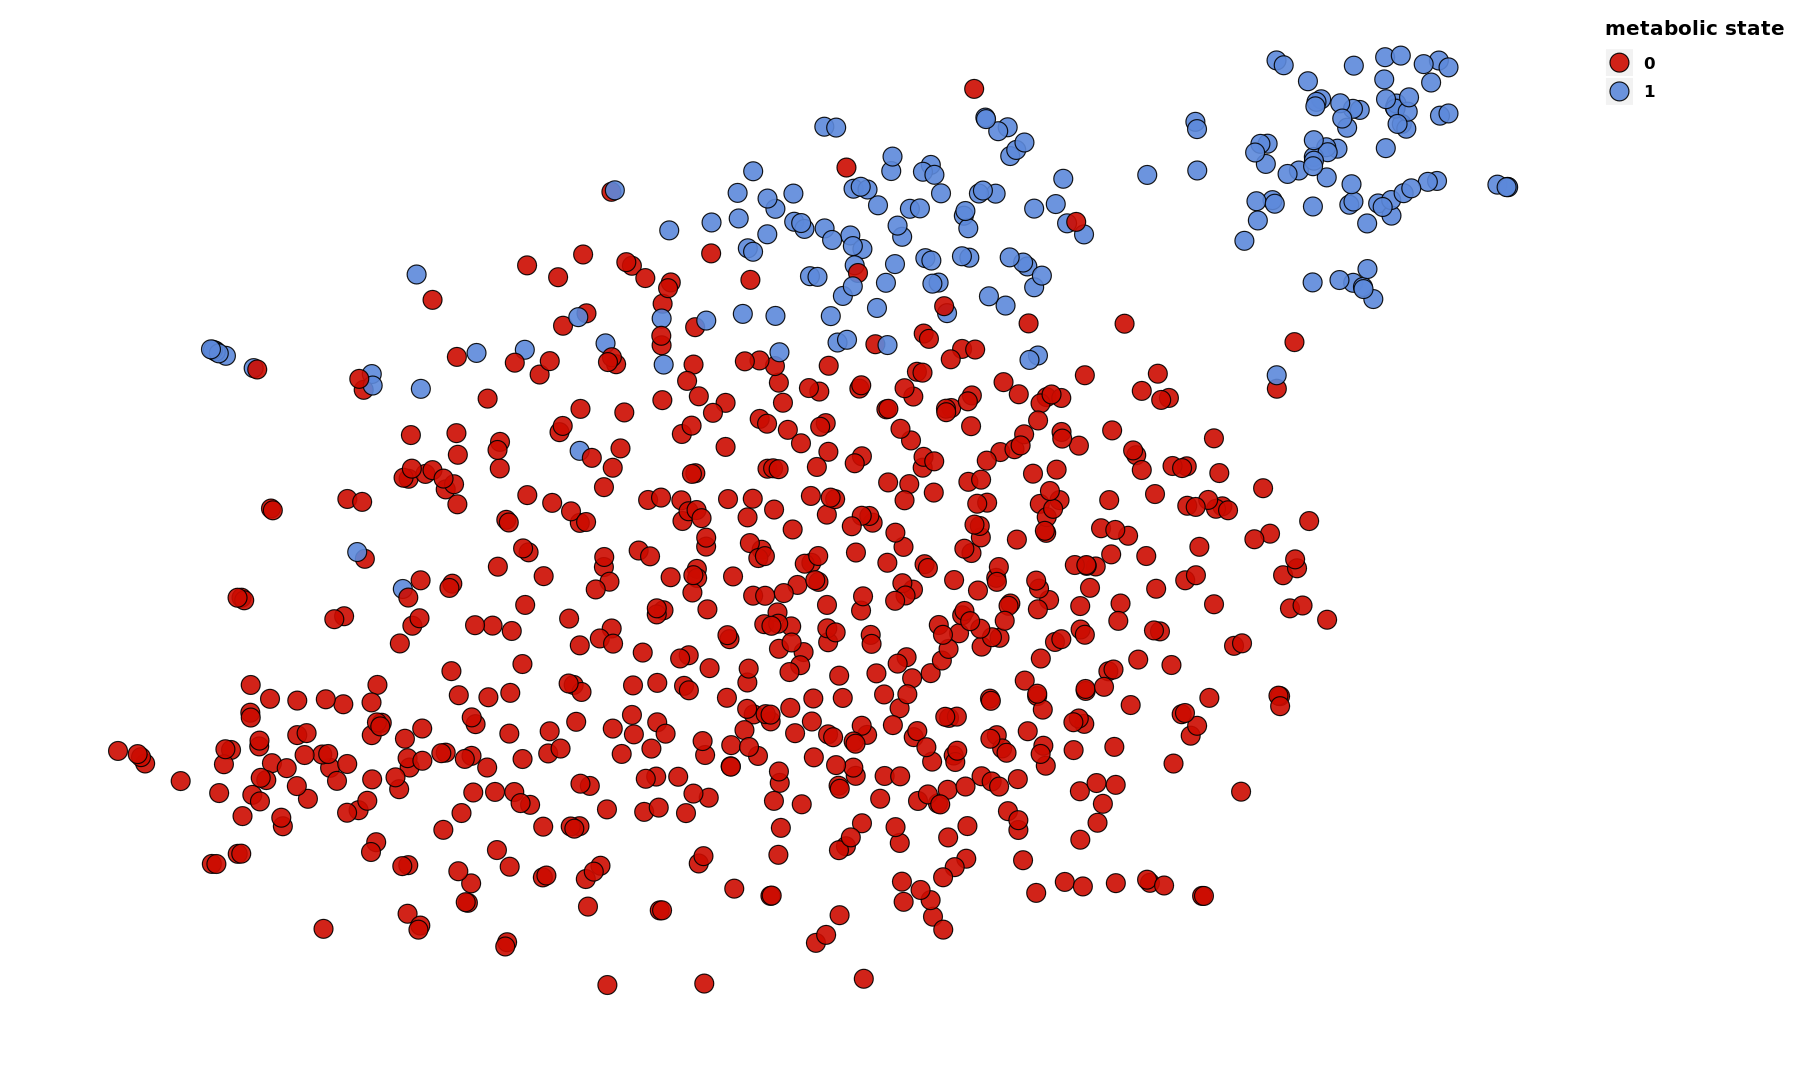

In [135]:
make_tsne_plot_Freda(E175_Cortical_metabolic_minclusters)

In [136]:
table(E175_Cortical_metabolic_minclusters@ident)


  0   1 
653 185 

In [137]:
saveRDS(E175_Cortical_metabolic_minclusters, "E175_Cortical_metabolic_minclusters.rds")

### Get 3,4,5 clusters

In [138]:
E175_Cortical_metabolic_cluster_n3 <- FindClusters(object = E175_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.43, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E175_Cortical_metabolic_cluster_n3@ident)


  0   1   2 
546 193  99 

In [139]:
E175_Cortical_metabolic_cluster_n4 <- FindClusters(object = E175_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 0.6, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E175_Cortical_metabolic_cluster_n4@ident)


  0   1   2   3 
420 230 113  75 

In [140]:
E175_Cortical_metabolic_cluster_n5 <- FindClusters(object = E175_Cortical_metabolic, reduction.type = "pca", 
                                          dims.use = 1:20, resolution = 1, print.output = 0, 
                                          save.SNN = TRUE, force.recalc = T)
table(E175_Cortical_metabolic_cluster_n5@ident)


  0   1   2   3   4 
213 211 198 141  75 

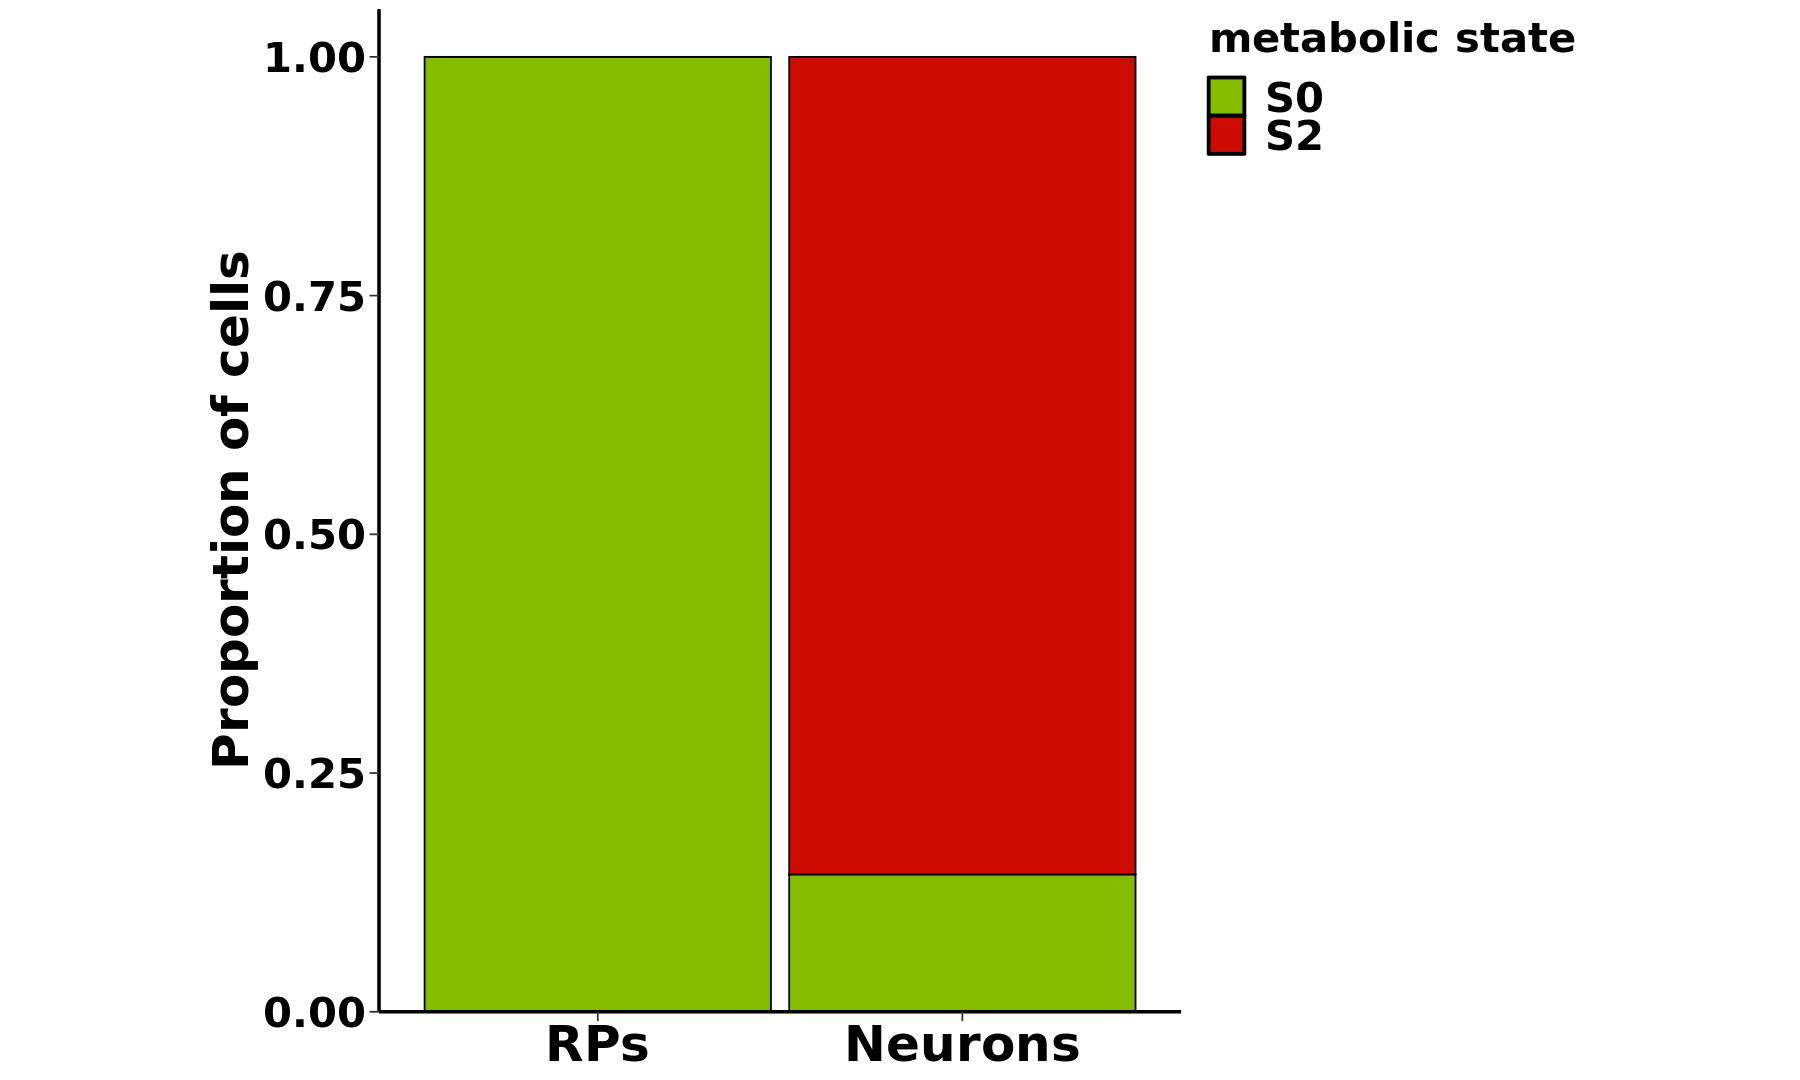

In [141]:
E175_overlap_minclusters <- get_overlap_df_two_clusters(E175_Cortical, E175_Cortical_metabolic_minclusters, 
                                                        cell_types = c("Neurons", "RPs"))
overlap_plot(E175_overlap_minclusters, fill_list =  c("0" = pal_startrek("uniform")(7)[1], 
                                                      "1" = pal_startrek("uniform")(7)[3]),
             scale_x = c("RPs","Neurons"), 
             label_vals = c("1" = "S0", "0" = "S2"), reverse = T)

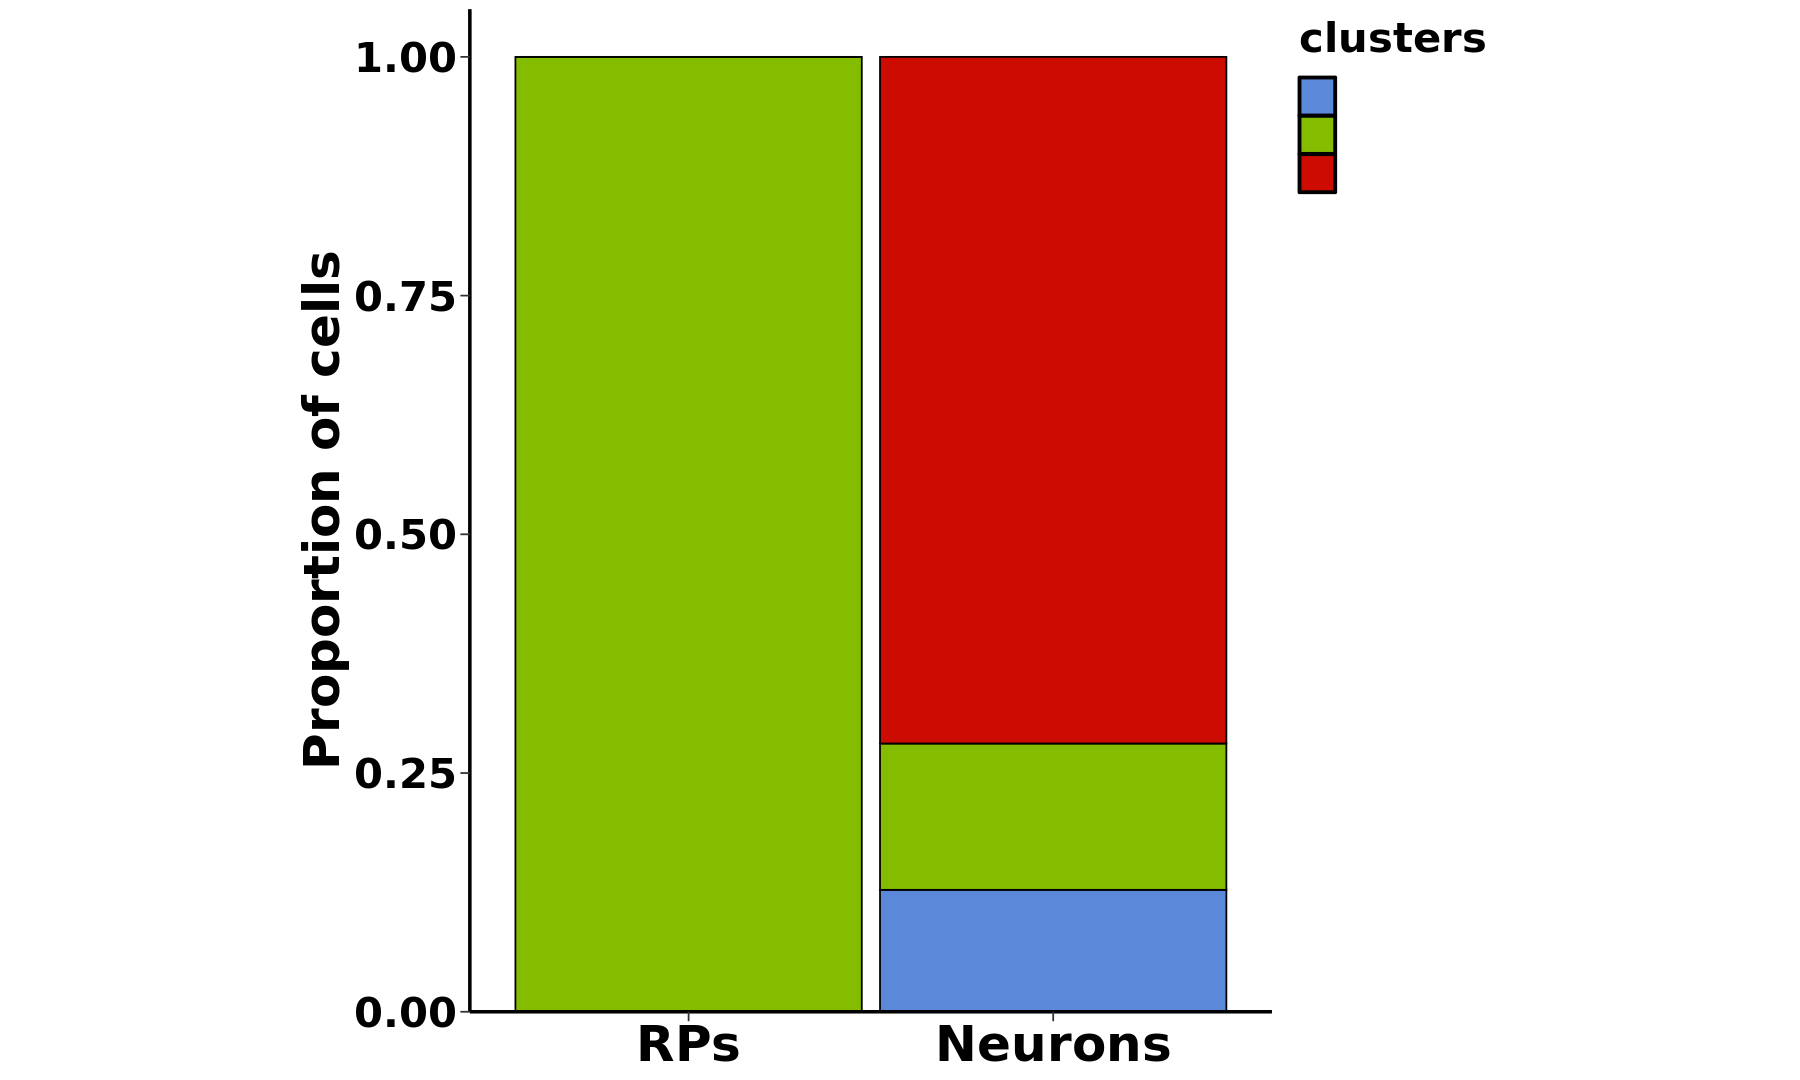

In [191]:
E175_overlap_df_n3 <- get_overlap_df_two_clusters(E175_Cortical, E175_Cortical_metabolic_cluster_n3, 
                                                  cell_types = c("Neurons", "RPs"))
p <- overlap_plot(E175_overlap_df_n3, fill_list =  c("0" = pal_startrek("uniform")(7)[1], 
                                                "1" = pal_startrek("uniform")(7)[3], 
                                                "2" = pal_startrek("uniform")(7)[2]),
             label_vals = c("0" = "",  "1" = "", "2" = ""), 
             scale_x = c("RPs","Neurons"),
             legend_label = "clusters")
ggsave("cluster_barplots/E17_celltype_n3.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

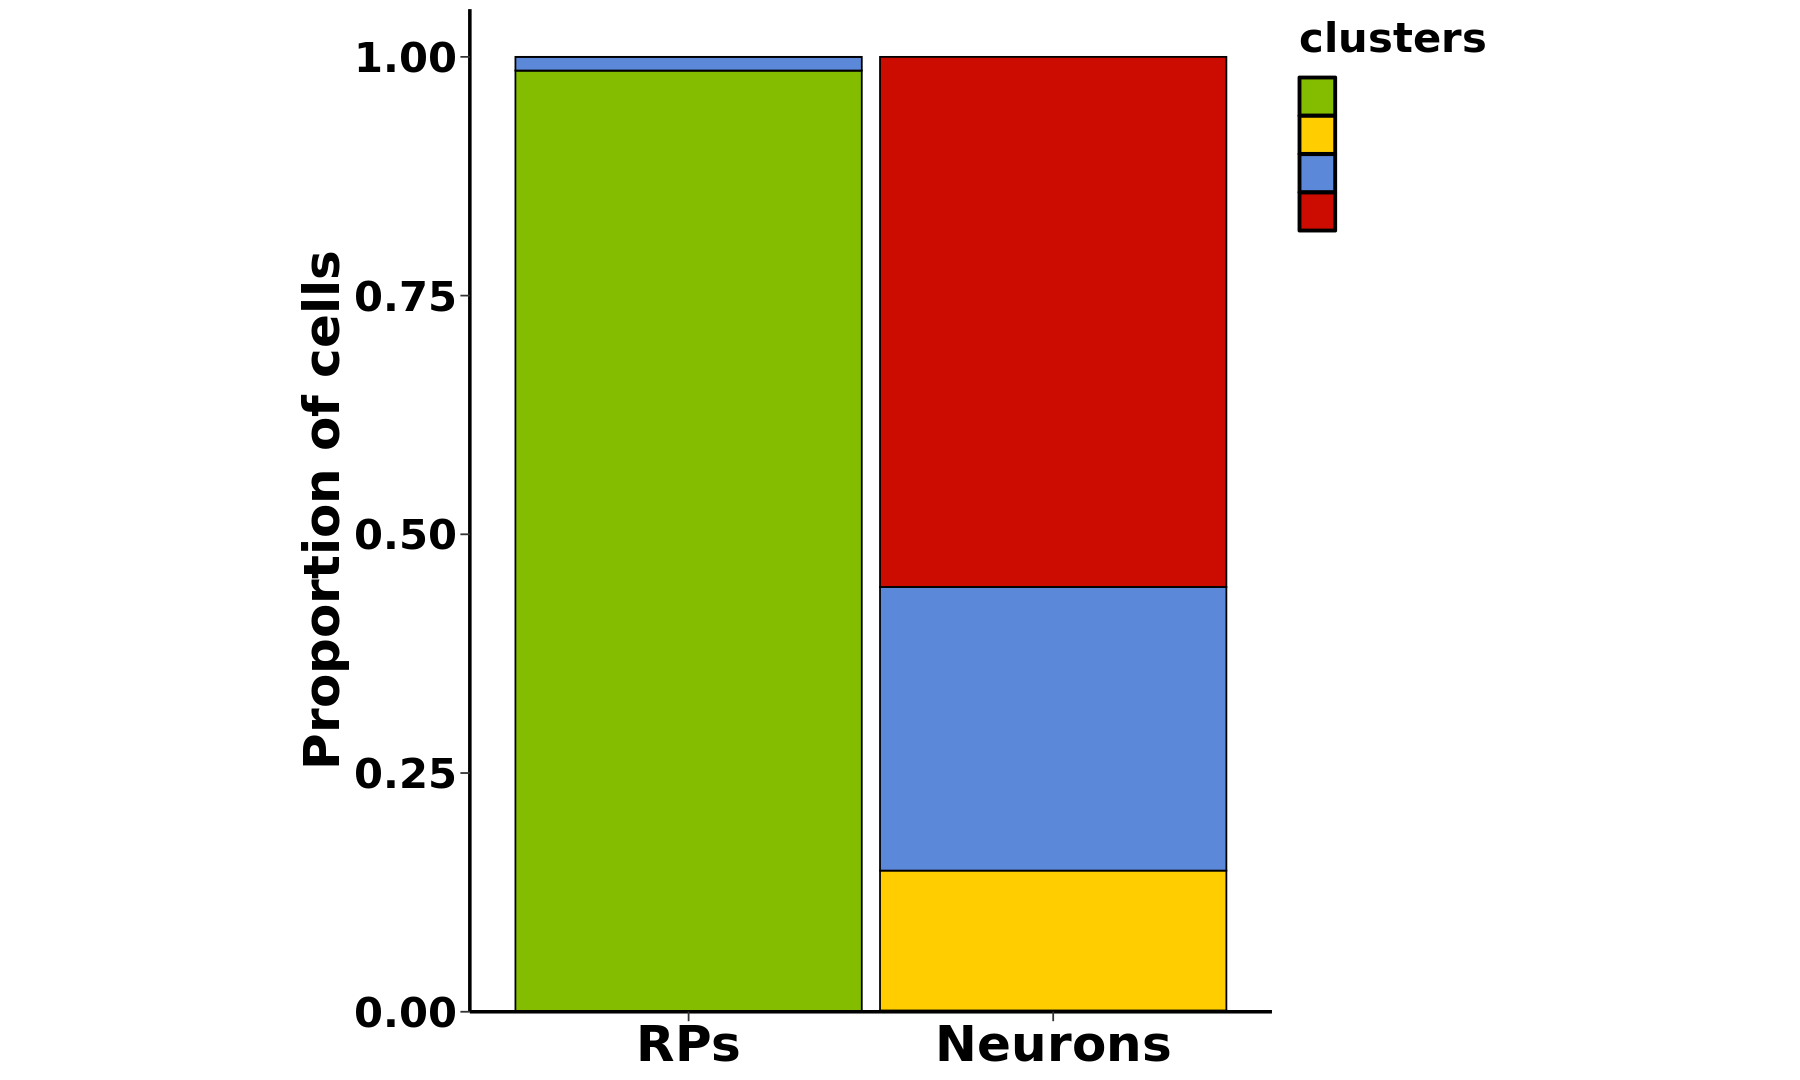

In [196]:
E175_overlap_df_n4 <- get_overlap_df_two_clusters(E175_Cortical, E175_Cortical_metabolic_cluster_n4, 
                                                  cell_types = c("Neurons", "RPs"))
p <- overlap_plot(E175_overlap_df_n4, fill_list =  c("0" = pal_startrek("uniform")(7)[1], 
                                                "1" = pal_startrek("uniform")(7)[2], 
                                                "2" = pal_startrek("uniform")(7)[4],
                                                 "3" = pal_startrek("uniform")(7)[3]),
             label_vals = c("0" = "",  "1" = "", "2" = "", "3" = ""), 
             scale_x = c("RPs","Neurons"),
             legend_label = "clusters")
ggsave("cluster_barplots/E17_celltype_n4.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

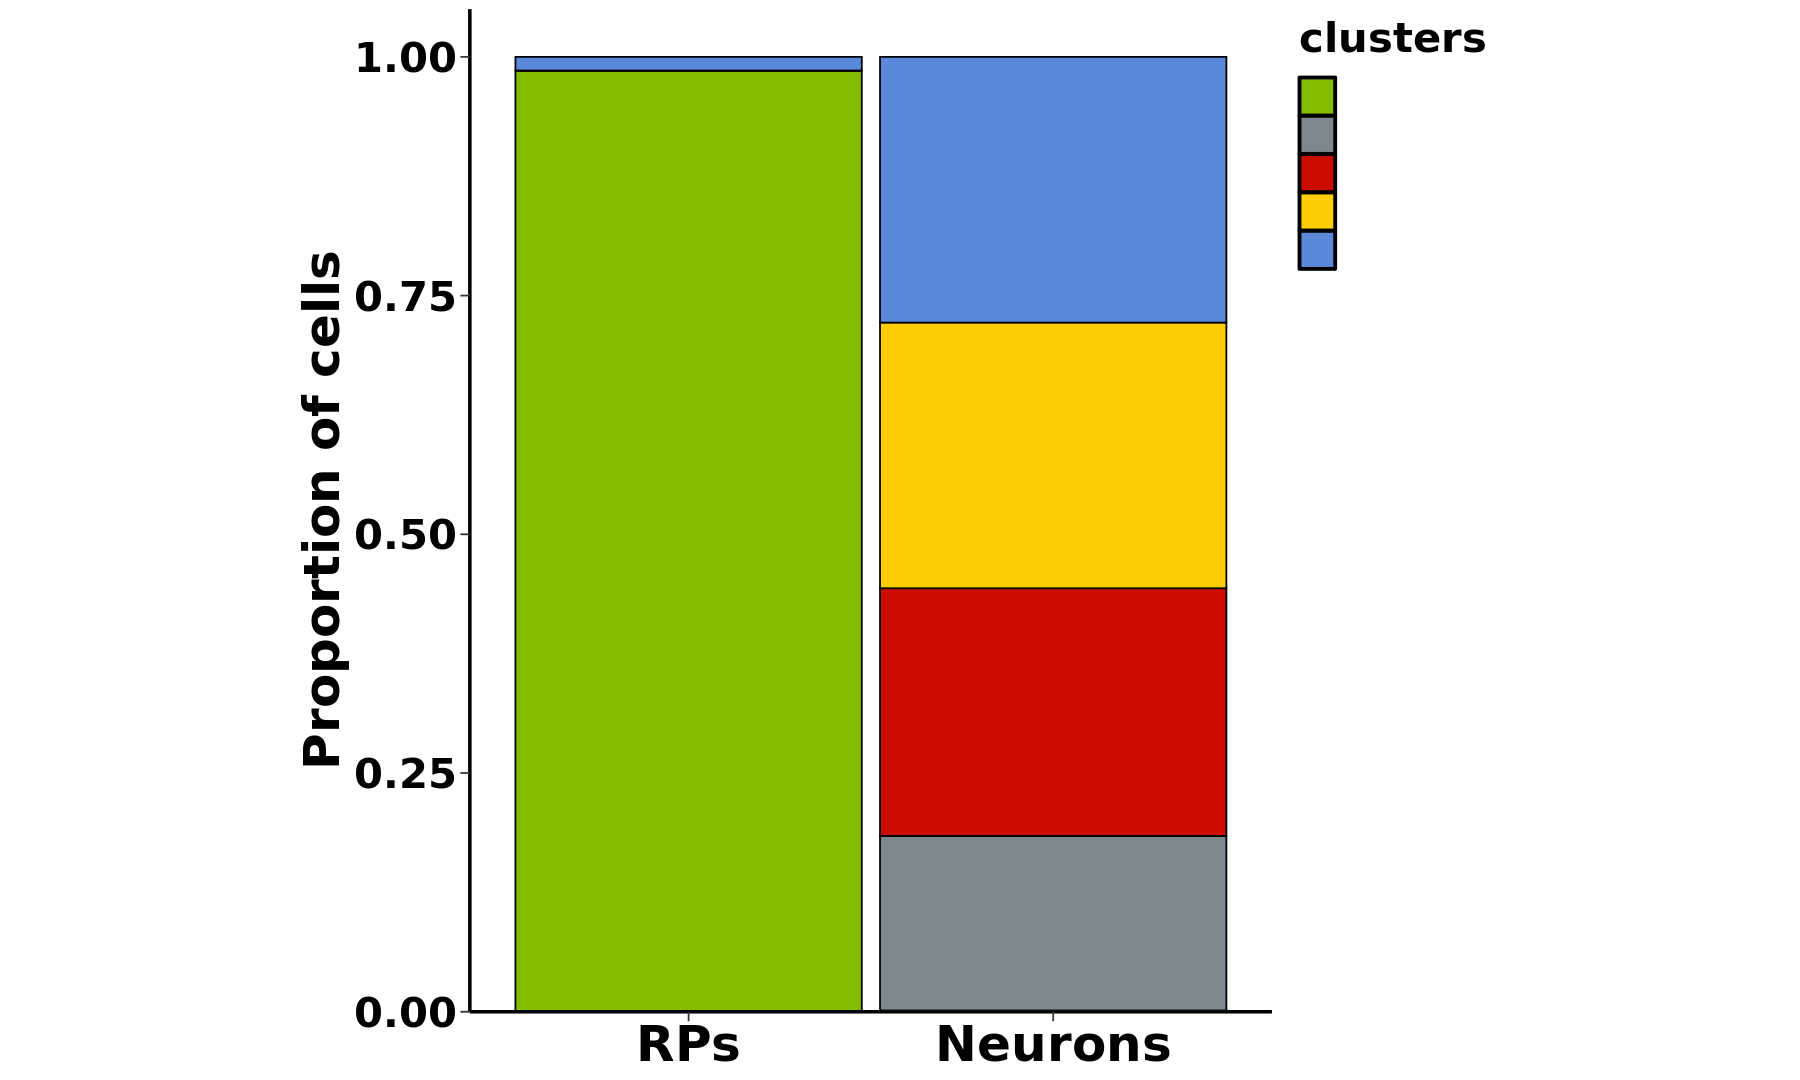

In [205]:
E175_overlap_df_n5 <- get_overlap_df_two_clusters(E175_Cortical, E175_Cortical_metabolic_cluster_n5, 
                                                  cell_types = c("Neurons", "RPs"))
p <- overlap_plot(E175_overlap_df_n5, fill_list =  c("0" = pal_startrek("uniform")(7)[2], 
                                                "1" = pal_startrek("uniform")(7)[4], 
                                                "2" = pal_startrek("uniform")(7)[1],
                                                "3" = pal_startrek("uniform")(7)[5],
                                                "4" = pal_startrek("uniform")(7)[3]),
             label_vals = c("0" = "",  "1" = "", "2" = "", "3" = "", "4" = ""), 
             scale_x = c("RPs","Neurons"),
             legend_label = "clusters")
ggsave("cluster_barplots/E17_celltype_n5.pdf",p, width=33, height=22, units="in", scale=0.3, limitsize = F)
p

In [206]:
save.image("metabolic_genes_TSNE.Rdata")